In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **Connect Data Warehouses**

In [2]:
file_path = "/content/Warehouses.xlsx"

data_Warehouses = pd.read_excel(file_path)
data_Warehouses.head(20)

,Warehouse Name,Code,Region
0,DB 1,14856,Delta
1,DB 2,60722,Delta
2,DB 3,12422,Upper
3,DB 4,99510,Delta
4,DB 5,13887,Cairo/Giza
5,DB 6,27753,Delta
6,DB 7,39145,Upper


# **Connect Data Report**

In [3]:
file_path = "/content/Reps List.xlsx"

data_Rep = pd.read_excel(file_path)
data_Rep.head(20)

,ID,Name,Username,Role,ZONE,Distributor
0,1,Mohamed Hussein,Rep0003,SalesMan,Delta,DB 1
1,2,Thabet Ali,Rep0004,SalesMan,Delta,DB 2
2,3,Amgad Mohsen,Rep0005,SalesMan,Upper,DB 3
3,4,Baher,Rep0006,SalesMan,Delta,DB 4
4,5,Omar,Rep0007,SalesMan,Cairo/Giza,DB 5
5,6,Yasser,Rep0008,SalesMan,Delta,DB 6
6,7,Osama,Rep0009,SalesMan,Upper,DB 7
7,8,Amgad,Rep0010,SalesMan,Delta,DB 4
8,9,محمد احمد,Rep0011,SalesMan,Upper,DB 7
9,10,أمير,Rep0012,SalesMan,Upper,DB 3


# **Connect Data Product**

In [4]:
file_path = "/content/Products.csv"
col_types={
    "Product ID":str,
    "Product Code":str,

}
data_product = pd.read_csv(file_path,dtype=col_types)
data_product.head(3)

,Product ID,Product Code,Product Name,Category,subcategory,Price,Unnamed: 6,Unnamed: 7,29034,96938
0,1,96938,Detergent 120ml,Detergent,Detergent 120ml,19.84,NaN,NaN,33590,52554
1,2,52554,Soap 125gm - Normal,Soap,BS 125,8.33,NaN,NaN,33591,22134
2,3,22134,Soap 125gm - Red,Soap,BS 125,8.33,NaN,NaN,33592,75443


# **Explore Data**

In [5]:
data_product.shape

(123, 10)

In [6]:
data_product.columns

Index(['Product ID', 'Product Code', 'Product Name', 'Category', 'subcategory',
       'Price', 'Unnamed: 6', 'Unnamed: 7', '29034', '96938'],
      dtype='object')

In [7]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product ID    50 non-null     object 
 1   Product Code  50 non-null     object 
 2   Product Name  50 non-null     object 
 3   Category      50 non-null     object 
 4   subcategory   50 non-null     object 
 5   Price         50 non-null     float64
 6   Unnamed: 6    0 non-null      float64
 7   Unnamed: 7    0 non-null      float64
 8   29034         122 non-null    object 
 9   96938         123 non-null    int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 9.7+ KB


In [8]:
data_product = data_product.drop(columns=['Unnamed: 6',"Unnamed: 7","29034","96938"],axis=1)

In [9]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product ID    50 non-null     object 
 1   Product Code  50 non-null     object 
 2   Product Name  50 non-null     object 
 3   Category      50 non-null     object 
 4   subcategory   50 non-null     object 
 5   Price         50 non-null     float64
dtypes: float64(1), object(5)
memory usage: 5.9+ KB


In [10]:
data_product["Product Code"].nunique()

50

In [11]:
print(type(data_product))

<class 'pandas.core.frame.DataFrame'>


In [12]:
#Check duplicated
data_product.duplicated().sum()

72

In [13]:
#Remove duplicated
data_product.drop_duplicates(inplace=True)

In [14]:
data_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product ID    50 non-null     object 
 1   Product Code  50 non-null     object 
 2   Product Name  50 non-null     object 
 3   Category      50 non-null     object 
 4   subcategory   50 non-null     object 
 5   Price         50 non-null     float64
dtypes: float64(1), object(5)
memory usage: 2.8+ KB


In [15]:
data_product["Product Name"].nunique()

49

In [16]:
data_product["Product Name"].value_counts().sum()

50

In [17]:
data_product["Product Name"].unique()

array(['Detergent 120ml', 'Soap 125gm - Normal', 'Soap 125gm - Red',
       'Soap 125gm - blue', 'Soap 125gm - yellow', 'Soap 165gm - Normal',
       'Soap 165gm - Red', 'Soap 165gm - blue', 'Soap 165gm - yellow',
       'Soap 60gm - Normal', 'Soap 60gm - blue', 'Soap 60gm - Red',
       'Soap 60gm - yellow', 'Soap 85gm - 24pcs Normal',
       'Soap 85gm - Normal', 'Soap 85gm - Red', 'Soap 85gm - blue',
       'Soap 85gm - yellow', 'Soap 85gm Normal 4 pcs - 3 EGP Discount',
       'Soap 85gm Red 4 pcs - 3 EGP Discount', 'Detergent 50ml',
       'Detergent 500ml discounted 10%', 'Detergent 1L discounted 10%',
       'Detergent 235ml', 'Detergent 750ml', 'Detergent 245ml',
       'Detergent 500ml', 'Detergent 1L', 'Soap 115gm - Normal',
       'Soap 115gm - Red', 'Soap 115gm - blue', 'Soap 115gm - yellow',
       'SG 300ml', 'SG 300ml Normal 2 Pcs with 50% discount',
       'SG 300ml Fresh 2 Pcs with 50% discount',
       'Soap 115gm - Normal 4 pcs 4EGP Discount',
       'Soap 115gm - Re

In [18]:
product_counts = data_product["Product Name"].value_counts()
product_counts

,count
Product Name,
Detergent 750ml,2
Detergent 245ml,1
Detergent 1L,1
Soap 115gm - Normal,1
Soap 115gm - Red,1
Soap 115gm - blue,1
Soap 115gm - yellow,1
SG 300ml,1
SG 300ml Normal 2 Pcs with 50% discount,1


In [19]:
product_Category = data_product["Category"].value_counts()
product_Category

,count
Category,
Soap,31
Detergent,11
Shower gel,8


In [20]:
data_product["subcategory"].nunique()

14

In [21]:
product_subcategory = data_product["subcategory"].value_counts()
product_subcategory

,count
subcategory,
BS 165,8
BS 115,8
Shower gel 250ml,8
BS 85,7
BS 125,4
BS 60,4
Detergent 500ml,3
Detergent 750ml,2
Detergent 120ml,1


In [22]:
group_category = data_product.groupby("Category")
group_category.get_group('Detergent')

,Product ID,Product Code,Product Name,Category,subcategory,Price
0,1,96938,Detergent 120ml,Detergent,Detergent 120ml,19.84
20,21,74527,Detergent 50ml,Detergent,Detergent 50ml,53.56
21,22,41850,Detergent 500ml discounted 10%,Detergent,Detergent 500ml,47.83
22,23,82910,Detergent 1L discounted 10%,Detergent,Detergent 1 L 85 EGP,198.03
23,24,74501,Detergent 235ml,Detergent,Detergent Promo 235ml,38.66
24,25,42400,Detergent 750ml,Detergent,Detergent 750ml,147.72
25,26,70804,Detergent 245ml,Detergent,Detergent 245ml,38.67
26,27,53774,Detergent 500ml,Detergent,Detergent 500ml,74.36
27,28,14599,Detergent 750ml,Detergent,Detergent 750ml,108.06
28,29,32354,Detergent 1L,Detergent,Detergent 1 L,141.77


In [23]:
group_category.get_group('Detergent').describe()["Price"]

,Price
count,11.000000
mean,89.769091
std,56.912435
min,19.840000
25%,43.250000
50%,74.360000
75%,130.365000
max,198.030000


In [24]:
group_category.get_group('Soap')

,Product ID,Product Code,Product Name,Category,subcategory,Price
1,2,52554,Soap 125gm - Normal,Soap,BS 125,8.33
2,3,22134,Soap 125gm - Red,Soap,BS 125,8.33
3,4,75443,Soap 125gm - blue,Soap,BS 125,8.33
4,5,99185,Soap 125gm - yellow,Soap,BS 125,8.33
5,6,39671,Soap 165gm - Normal,Soap,BS 165,10.83
6,7,98761,Soap 165gm - Red,Soap,BS 165,10.83
7,8,78236,Soap 165gm - blue,Soap,BS 165,10.83
8,9,27977,Soap 165gm - yellow,Soap,BS 165,10.83
9,10,77397,Soap 60gm - Normal,Soap,BS 60,3.50
10,11,91553,Soap 60gm - blue,Soap,BS 60,3.50


In [25]:
group_category.get_group('Soap').describe()["Price"]

,Price
count,31.000000
mean,15.175806
std,13.432929
min,3.500000
25%,5.420000
50%,8.330000
75%,27.330000
max,41.330000


In [26]:
group_category.get_group('Shower gel')

,Product ID,Product Code,Product Name,Category,subcategory,Price
33,34,90274,SG 300ml,Shower gel,Shower gel 250ml,40.83
34,35,73955,SG 300ml Normal 2 Pcs with 50% discount,Shower gel,Shower gel 250ml,61.25
35,36,35742,SG 300ml Fresh 2 Pcs with 50% discount,Shower gel,Shower gel 250ml,61.25
44,45,52568,SG blue 300 ml blue 2 pcs with 50% discount,Shower gel,Shower gel 250ml,53.73
45,46,14778,SG Red 300 ml Red 2 pcs with 50% discount,Shower gel,Shower gel 250ml,53.73
46,47,74058,SG Red 300 ml,Shower gel,Shower gel 250ml,40.83
47,48,56345,SG blue 300 ml,Shower gel,Shower gel 250ml,40.83
48,49,44449,SG yellow 300 ml,Shower gel,Shower gel 250ml,40.83


In [27]:
group_category.get_group('Shower gel').describe()["Price"]

,Price
count,8.000000
mean,49.160000
std,9.347739
min,40.830000
25%,40.830000
50%,47.280000
75%,55.610000
max,61.250000


In [28]:
grouped_data = data_product.groupby(['Category', 'subcategory', 'Product Name'])['Price'].agg(['sum', 'count'])
grouped_data

sum  \
Category   subcategory           Product Name                                          
Detergent  Detergent 1 L         Detergent 1L                                 141.77   
           Detergent 1 L 85 EGP  Detergent 1L discounted 10%                  198.03   
           Detergent 120ml       Detergent 120ml                               19.84   
           Detergent 245ml       Detergent 245ml                               38.67   
           Detergent 500ml       Detergent 500ml                               74.36   
                                 Detergent 500ml 2 pcs with 50% discount      118.96   
                                 Detergent 500ml discounted 10%                47.83   
           Detergent 50ml        Detergent 50ml                                53.56   
           Detergent 750ml       Detergent 750ml                              255.78   
           Detergent Promo 235ml Detergent 235ml                               38.66   
Shower gel Shower gel 250ml      SG 300ml                                      40.83   
                                 SG 300ml Fresh 2 Pcs with 50% discount        61.25   
                                 SG 300ml Normal 2 Pcs with 50% discount       61.25   
                                 SG Red 300 ml                                 40.83   
                                 SG Red 300 ml Red 2 pcs with 50% discount     53.73   
                                 SG blue 300 ml                                40.83   
                                 SG blue 300 ml blue 2 pcs with 50% discount   53.73   
                                 SG yellow 300 ml                              40.83   
Soap       BS 115                Soap 115gm - Normal                            8.33   
                                 Soap 115gm - Normal 4 pcs 4EGP Discount       31.33   
                                 Soap 115gm - Red                               8.33   
                                 Soap 115gm - Red 4 pcs 4 EGP Discount         31.33   
                                 Soap 115gm - blue                              8.33   
                                 Soap 115gm - blue 4 pcs 4 EGP Discount        31.33   
                                 Soap 115gm - yellow                            8.33   
                                 Soap 115gm - yellow 4 pcs 4 EGP Discount      31.33   
           BS 125                Soap 125gm - Normal                            8.33   
                                 Soap 125gm - Red                               8.33   
                                 Soap 125gm - blue                              8.33   
                                 Soap 125gm - yellow                            8.33   
           BS 165                Soap 165gm - Normal                           10.83   
                                 Soap 165gm - Normal 4 pcs 4EGP Discount       41.33   
                                 Soap 165gm - Red                              10.83   
                                 Soap 165gm - Red 4 pcs 4 EGP Discount         41.33   
                                 Soap 165gm - blue                             10.83   
                                 Soap 165gm - blue 4 pcs 4 EGP Discount        41.33   
                                 Soap 165gm - yellow                           10.83   
                                 Soap 165gm - yellow 4 pcs 4 EGP Discount      41.33   
           BS 60                 Soap 60gm - Normal                             3.50   
                                 Soap 60gm - Red                                3.50   
                                 Soap 60gm - blue                               3.50   
                                 Soap 60gm - yellow                             3.50   
           BS 85                 Soap 85gm - 24pcs Normal                       5.42   
                                 Soap 85gm - Normal                             5.42   
                                 

In [29]:
total_price = grouped_data.sum()
print(total_price)

sum      1851.19
count      50.00
dtype: float64


# **Connect Data Sales**

In [30]:
file_path = "/content/Sales.xlsx"
col_types={
    "Outlet_Id":str,
    "PRODUCT_CODE":str
}
data_Sales = pd.read_excel(file_path,dtype=col_types)
data_Sales.sample(5)

,Date,Sub_Db_Name,Username,Name_Of_The_User,Outlet_Id,PRODUCT_CODE,Product Name,Quantity,Price_Per_Piece,Total Price
24635,2020-10-07,DB 2,Rep0004,Thabet Ali,2542,78236,Soap 165gm - blue,1,10.83,10.83
103958,2021-02-23,DB 4,Rep0010,Amgad,2662,98761,Soap 165gm - Red,4,10.83,43.32
176074,2020-07-05,DB 1,Rep0013,Rep 13,4166,74501,Detergent 235ml,2,38.66,77.32
157419,2020-05-21,DB 4,Rep0010,Amgad,3236,53774,Detergent 500ml,12,74.36,892.32
48779,2020-11-16,DB 3,Rep0014,Rep 14,1913,98761,Soap 165gm - Red,1,10.83,10.83


# **Explore Data**

In [31]:
data_Sales.shape

(219794, 10)

In [32]:
data_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219794 entries, 0 to 219793
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              219794 non-null  datetime64[ns]
 1   Sub_Db_Name       219794 non-null  object        
 2   Username          219794 non-null  object        
 3   Name_Of_The_User  219794 non-null  object        
 4   Outlet_Id         219794 non-null  object        
 5   PRODUCT_CODE      219794 non-null  object        
 6   Product Name      219794 non-null  object        
 7   Quantity          219794 non-null  int64         
 8   Price_Per_Piece   219794 non-null  float64       
 9   Total Price       219794 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 16.8+ MB


In [33]:
data_Sales["Username"].unique()

array(['Rep0010', 'Rep0007', 'Rep0003', 'Rep0013', 'Rep0009', 'Rep0012',
       'Rep0006', 'Rep0011', 'Rep0008', 'Rep0014', 'Rep0004', 'Rep0005'],
      dtype=object)

In [34]:
data_Sales["Name_Of_The_User"].unique()

array(['Amgad', 'Omar', 'Mohamed Hussein', 'Rep 13', 'Osama', 'أمير',
       'Baher', 'محمد احمد', 'Yasser', 'Rep 14', 'Thabet Ali',
       'Amgad Mohsen'], dtype=object)

In [35]:
data_Sales["Username"]=data_Sales["Username"].str.replace("Rep000","")
data_Sales["Username"]=data_Sales["Username"].str.replace("Rep00","")
data_Sales["Name_Of_The_User"]=data_Sales["Name_Of_The_User"].str.replace("محمد احمد","Mohammed Ahmed")
data_Sales["Name_Of_The_User"]=data_Sales["Name_Of_The_User"].str.replace("أمير","Amir")


In [36]:
data_Sales[ "PRODUCT_CODE"].nunique()

50

In [37]:
data_Sales[ "Date"].nunique()

400

In [38]:
data_Sales[ "Outlet_Id"].nunique()

5166

In [39]:
data_Sales[ "Product Name"].nunique()

49

In [40]:
data_Sales['Day'] = data_Sales['Date'].dt.day
data_Sales['Month'] = data_Sales['Date'].dt.month
data_Sales['Year'] = data_Sales['Date'].dt.year

data_Sales.head()

,Date,Sub_Db_Name,Username,Name_Of_The_User,Outlet_Id,PRODUCT_CODE,Product Name,Quantity,Price_Per_Piece,Total Price,Day,Month,Year
0,2020-01-01,DB 4,10,Amgad,81,96938,Detergent 120ml,48,19.84,952.32,1,1,2020
1,2020-01-01,DB 4,10,Amgad,81,52554,Soap 125gm - Normal,7,8.33,58.31,1,1,2020
2,2020-01-01,DB 4,10,Amgad,81,22134,Soap 125gm - Red,7,8.33,58.31,1,1,2020
3,2020-01-01,DB 4,10,Amgad,81,75443,Soap 125gm - blue,7,8.33,58.31,1,1,2020
4,2020-01-01,DB 4,10,Amgad,81,99185,Soap 125gm - yellow,7,8.33,58.31,1,1,2020


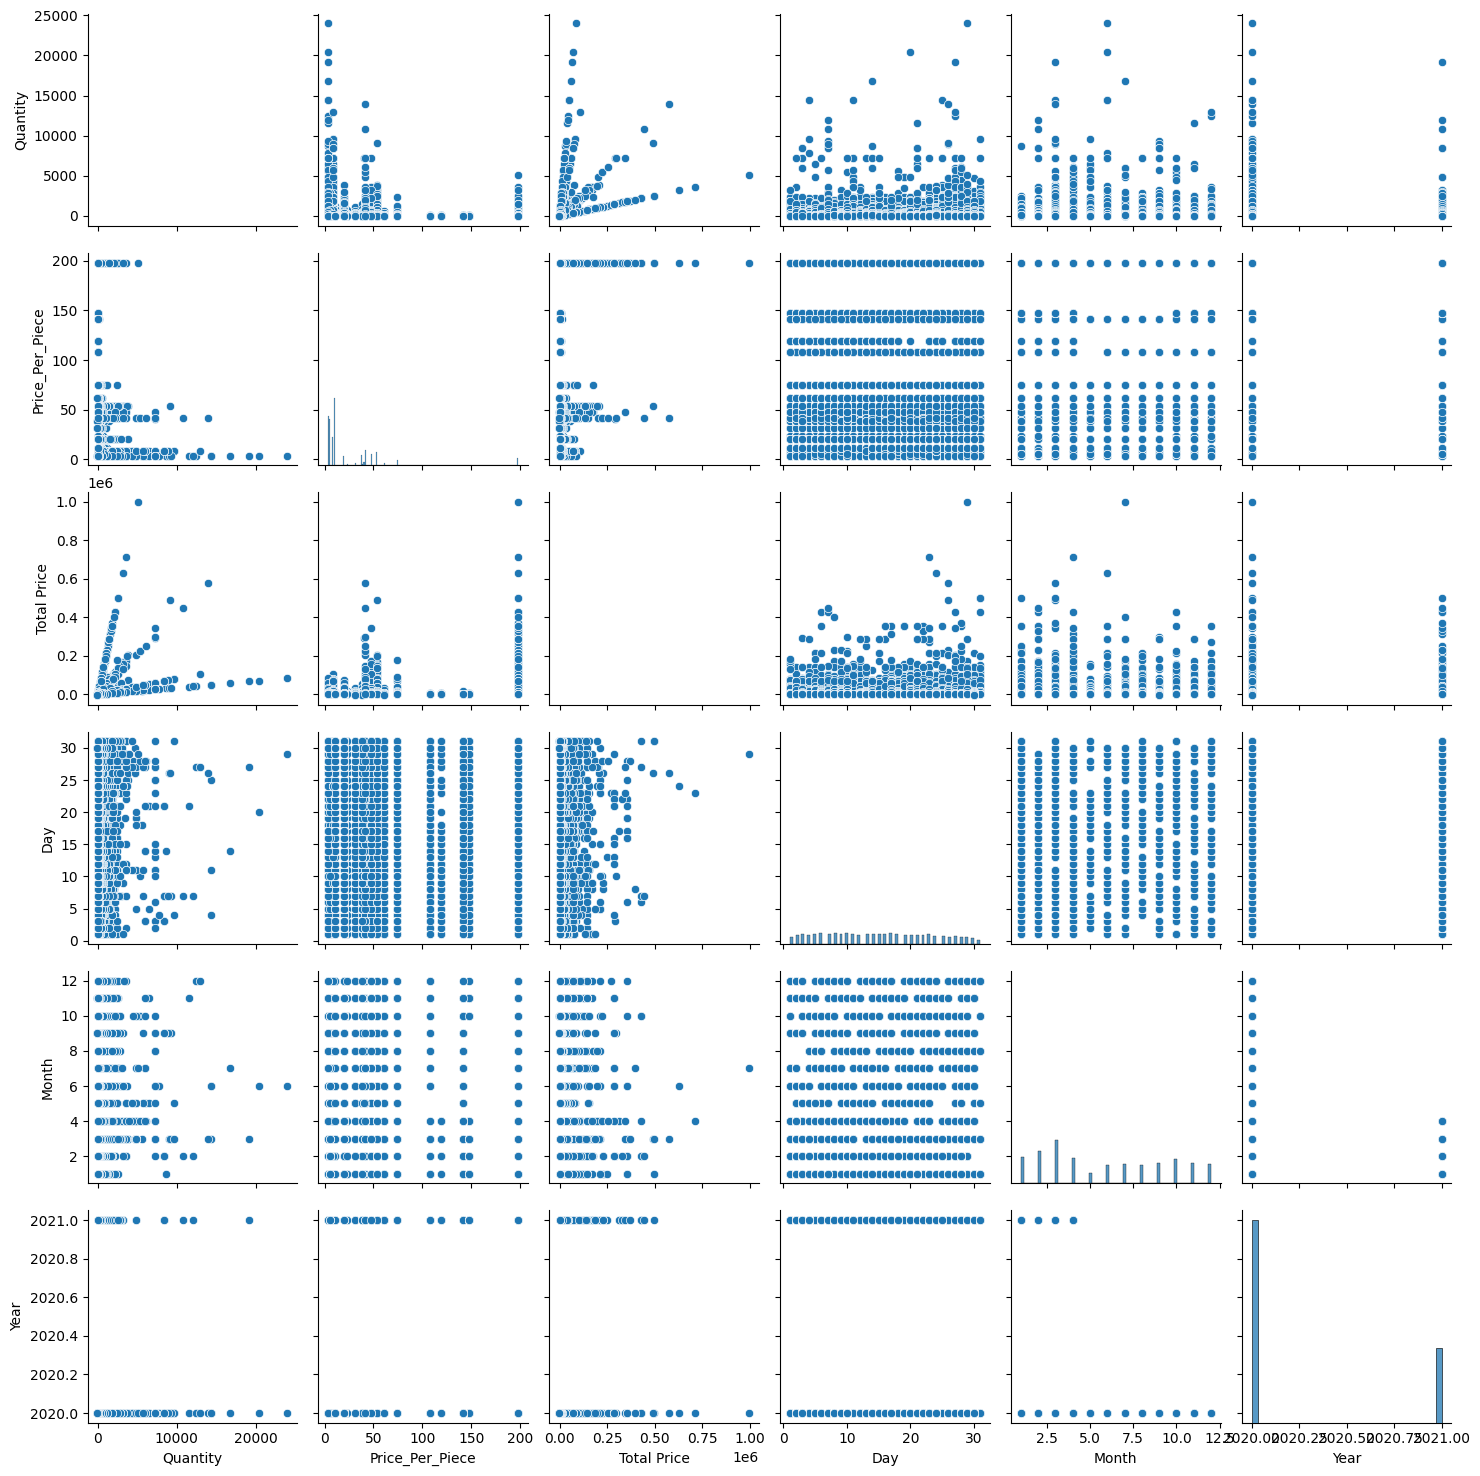

In [41]:
sns.pairplot(data_Sales)

In [42]:
data_Sales.describe()[["Quantity",	"Price_Per_Piece",	"Total Price"]]

,Quantity,Price_Per_Piece,Total Price
count,219794.000000,219794.000000,219794.000000
mean,43.725220,23.030462,1166.373364
min,-80.000000,3.500000,-3613.750000
25%,2.000000,5.420000,21.680000
50%,7.000000,10.830000,82.660000
75%,24.000000,38.660000,357.120000
max,24000.000000,198.030000,998071.200000
std,213.107483,35.153098,8283.969861


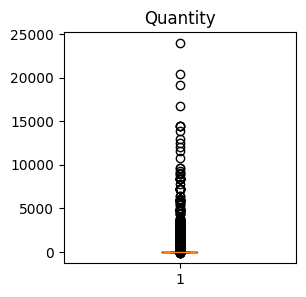

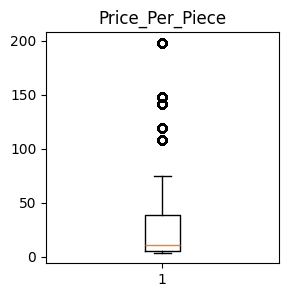

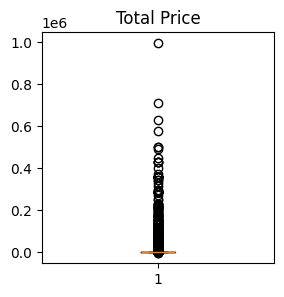

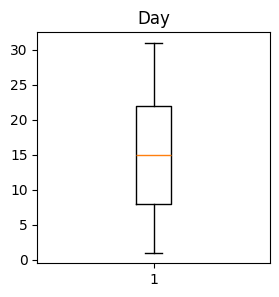

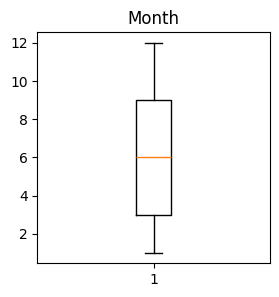

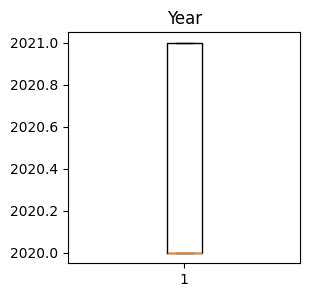

In [43]:
#Boxplot for each column
def create_boxplots(data_Sales):
    for col in data_Sales.columns:

        if pd.api.types.is_numeric_dtype(data_Sales[col]):
            plt.figure(figsize=(3, 3))
            plt.boxplot(data_Sales[col].dropna())
            plt.title(col)
            plt.show()

create_boxplots(data_Sales)

In [44]:
#Check normal value
data_Sales[data_Sales['Total Price'] < 0]

,Date,Sub_Db_Name,Username,Name_Of_The_User,Outlet_Id,PRODUCT_CODE,Product Name,Quantity,Price_Per_Piece,Total Price,Day,Month,Year
40112,2020-10-31,DB 1,3,Mohamed Hussein,2545,74501,Detergent 235ml,-1,38.66,-38.66,31,10,2020
40113,2020-10-31,DB 1,3,Mohamed Hussein,2545,55894,Soap 165gm - Normal 4 pcs 4EGP Discount,-12,41.33,-495.96,31,10,2020
40114,2020-10-31,DB 1,3,Mohamed Hussein,2545,78236,Soap 165gm - blue,-1,10.83,-10.83,31,10,2020
40115,2020-10-31,DB 2,4,Thabet Ali,1623,82733,Soap 85gm - Red,-6,5.42,-32.52,31,10,2020
40116,2020-10-31,DB 4,10,Amgad,2288,41850,Detergent 500ml discounted 10%,-6,47.83,-286.98,31,10,2020
40117,2020-10-31,DB 7,11,Mohammed Ahmed,4367,24050,Soap 85gm - 24pcs Normal,-6,5.42,-32.52,31,10,2020
40118,2020-10-31,DB 3,14,Rep 14,3632,27977,Soap 165gm - yellow,-1,10.83,-10.83,31,10,2020
56005,2020-11-30,DB 1,13,Rep 13,4853,60001,Soap 60gm - Red,-37,3.50,-129.50,30,11,2020
56006,2020-11-30,DB 5,7,Omar,1409,60001,Soap 60gm - Red,-37,3.50,-129.50,30,11,2020
56007,2020-11-30,DB 3,14,Rep 14,1272,96938,Detergent 120ml,-2,19.84,-39.68,30,11,2020


Note:

* Department 6 has no bills minus

* Date in late month (09-30)-(11-30)-(12-31)


*   no problem value that ( quantity and total price )minus





<ipython-input-45-8c388f4e2756>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_Sales['Total Price'])


<Axes: xlabel='Total Price', ylabel='Density'>

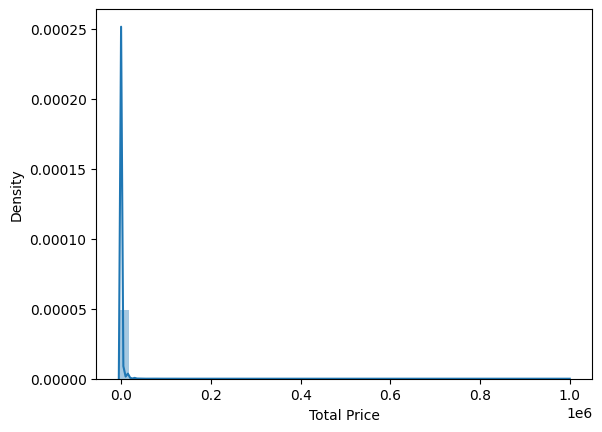

In [45]:
sns.distplot(data_Sales['Total Price'])

In [46]:

from scipy.stats import skew

# Calculate skewness
skewness = data_Sales['Total Price'].skew()

print(f"Skewness: {skewness}")
if skewness > 0:
    print("The data is right-skewed (positively skewed).")
elif skewness < 0:
    print("The data is left-skewed (negatively skewed).")
else:
    print("The data is symmetrical.")



Skewness: 35.251498099031
The data is right-skewed (positively skewed).


In [47]:
data_Sales["Outlet_Id"].nunique()

5166

In [48]:
#Split Product Name
#Add new column Category
def categorize_product(product_name):
    first_word = product_name.split()[0].lower()
    if first_word == 'soap':
        return 'Soap'
    elif first_word == 'detergent':
        return 'Detergent'
    elif first_word == 'sg':
        return 'Shower Gel'
    else:
        return 'Other'

data_Sales['Category'] = data_Sales['Product Name'].apply(categorize_product)


In [49]:
data_Sales["Category"].unique()

array(['Detergent', 'Soap', 'Shower Gel'], dtype=object)

In [50]:
data_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219794 entries, 0 to 219793
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              219794 non-null  datetime64[ns]
 1   Sub_Db_Name       219794 non-null  object        
 2   Username          219794 non-null  object        
 3   Name_Of_The_User  219794 non-null  object        
 4   Outlet_Id         219794 non-null  object        
 5   PRODUCT_CODE      219794 non-null  object        
 6   Product Name      219794 non-null  object        
 7   Quantity          219794 non-null  int64         
 8   Price_Per_Piece   219794 non-null  float64       
 9   Total Price       219794 non-null  float64       
 10  Day               219794 non-null  int32         
 11  Month             219794 non-null  int32         
 12  Year              219794 non-null  int32         
 13  Category          219794 non-null  object        
dtypes: d

In [51]:
data_Sales["Category"].value_counts()

,count
Category,
Soap,167739
Detergent,46635
Shower Gel,5420


In [52]:
category_total_price = data_Sales.groupby('Category')[['Total Price','Quantity']].sum()
category_total_price = category_total_price.sort_values(by=['Total Price'], ascending=False)
category_total_price_formatted = category_total_price.map('{:,.2f}'.format)
category_total_price_formatted

,Total Price,Quantity
Category,,
Detergent,"171,523,816.18","2,222,652.00"
Soap,"75,481,077.52","7,204,902.00"
Shower Gel,"9,356,973.53","182,987.00"


               Total Price      Quantity
Category                                
Detergent   171,523,816.18  2,222,652.00
Soap         75,481,077.52  7,204,902.00
Shower Gel    9,356,973.53    182,987.00


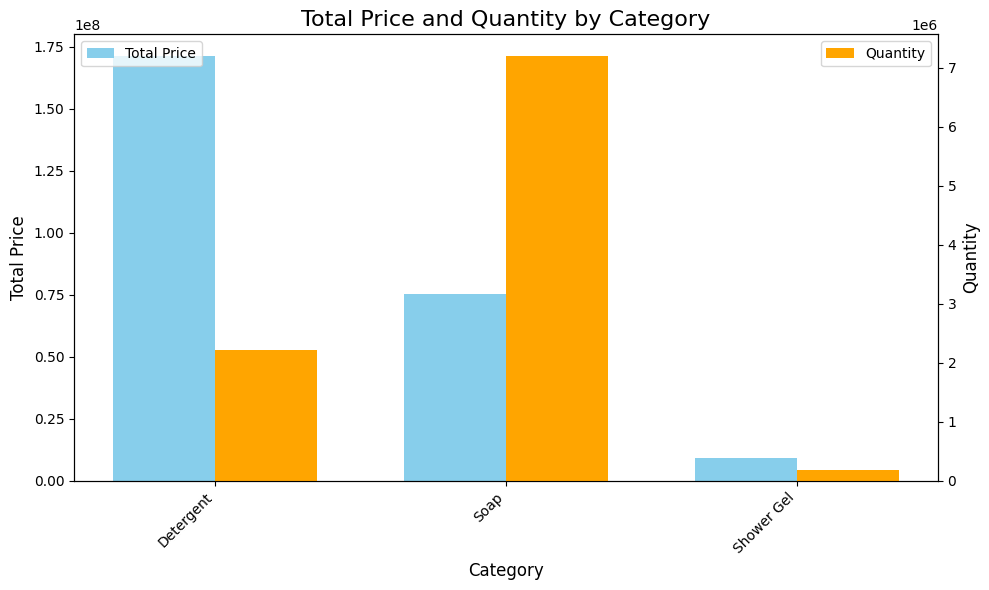

In [53]:
def categorize_product(product_name):
    first_word = product_name.split()[0].lower()
    if first_word == 'soap':
        return 'Soap'
    elif first_word == 'detergent':
        return 'Detergent'
    elif first_word == 'sg':
        return 'Shower Gel'
    else:
        return 'Other'

data_Sales['Category'] = data_Sales['Product Name'].apply(categorize_product)
category_total_price = data_Sales.groupby('Category')[['Total Price','Quantity']].sum()
category_total_price = category_total_price.sort_values(by=['Total Price'], ascending=False)
category_total_price_formatted = category_total_price.map('{:,.2f}'.format)
print(category_total_price_formatted)

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
x = np.arange(len(category_total_price.index))  # Use .index to get the categories
width = 0.35
ax1.bar(x - width/2, category_total_price['Total Price'], width, label='Total Price', color='skyblue')
ax1.set_ylabel('Total Price', fontsize=12)
ax1.set_xlabel('Category', fontsize=12)
ax1.set_title('Total Price and Quantity by Category', fontsize=16)
ax2 = ax1.twinx()
ax2.bar(x + width/2, category_total_price['Quantity'], width, label='Quantity', color='orange')
ax2.set_ylabel('Quantity', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(category_total_price.index, rotation=45, ha='right')  # Use .index to get the categories
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

Analysis Product Name Between Quantity and Total Price

In [54]:

grouped_sales_PNQT = data_Sales.groupby(['PRODUCT_CODE', 'Product Name'])[['Quantity', 'Total Price']].agg(
    Quantity_sum=('Quantity', 'sum'),
    Total_Price_sum=('Total Price', 'sum')
)

grouped_sales_PNQT

,,Quantity_sum,Total_Price_sum
PRODUCT_CODE,Product Name,,
11419,Soap 85gm - blue,11472,62178.24
14599,Detergent 750ml,1666,180027.96
14778,SG Red 300 ml Red 2 pcs with 50% discount,40700,2186811.00
18730,Soap 115gm - yellow,456680,3804144.40
22134,Soap 125gm - Red,314233,2617560.89
24050,Soap 85gm - 24pcs Normal,498501,2701875.42
25237,Soap 165gm - Red 4 pcs 4 EGP Discount,371105,15337769.65
27977,Soap 165gm - yellow,84349,913499.67
29213,Soap 165gm - blue 4 pcs 4 EGP Discount,2891,119485.03


In [55]:
top_10_total_price = grouped_sales_PNQT.nlargest(10, 'Total_Price_sum')
top_10_total_price

,,Quantity_sum,Total_Price_sum
PRODUCT_CODE,Product Name,,
82910,Detergent 1L discounted 10%,479124,94880925.72
74527,Detergent 50ml,687839,36840656.84
41850,Detergent 500ml discounted 10%,463453,22166956.99
55894,Soap 165gm - Normal 4 pcs 4EGP Discount,519125,21455436.25
25237,Soap 165gm - Red 4 pcs 4 EGP Discount,371105,15337769.65
96938,Detergent 120ml,439190,8713529.60
53774,Detergent 500ml,69264,5150471.04
82733,Soap 85gm - Red,927623,5027716.66
18730,Soap 115gm - yellow,456680,3804144.40


Top 10 Product Name Total Price

<ipython-input-56-c4d4ef676626>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Price_sum', y=top_10_total_price.index.get_level_values('Product Name'), data=top_10_total_price,palette='viridis')


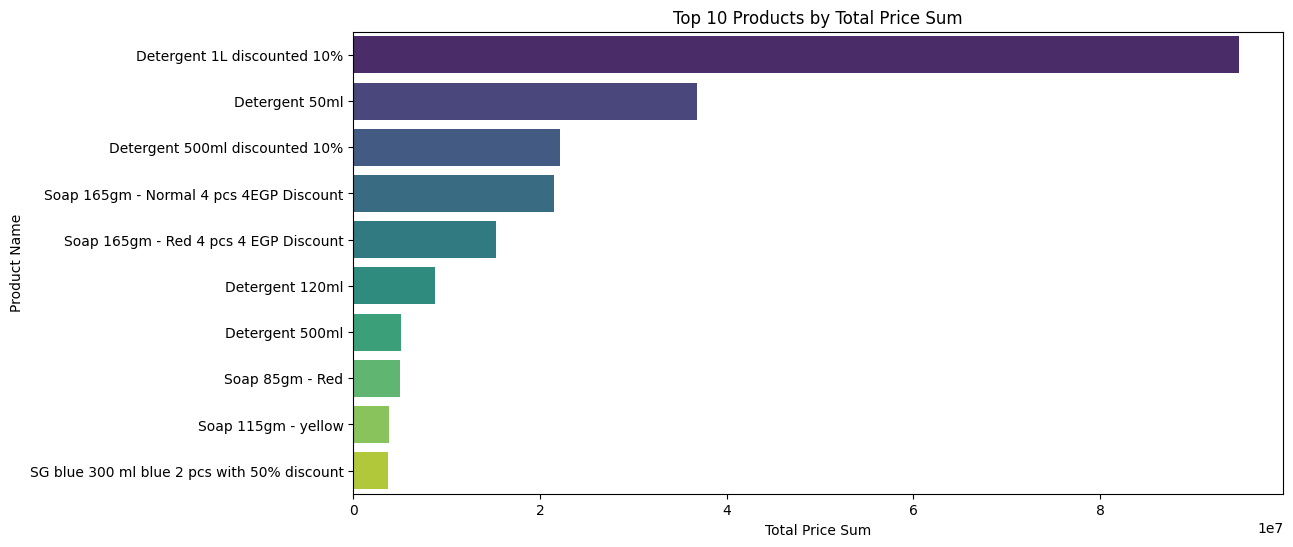

In [56]:

top_10_total_price = grouped_sales_PNQT.nlargest(10, 'Total_Price_sum')

plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Price_sum', y=top_10_total_price.index.get_level_values('Product Name'), data=top_10_total_price,palette='viridis')
plt.title('Top 10 Products by Total Price Sum')
plt.xlabel('Total Price Sum')
plt.ylabel('Product Name')
plt.show()

In [57]:
pivot_table_Category = pd.pivot_table(data_Sales,
                                   values=['Quantity','Total Price'],
                                   index=['PRODUCT_CODE', 'Category'],
                                   columns=['Year'],
                                   aggfunc='sum')
pivot_table_Category

Quantity          Total Price             
Year                        2020    2021         2020         2021
PRODUCT_CODE Category                                             
11419        Soap          10409    1063     56416.78      5761.46
14599        Detergent      1583      83    171058.98      8968.98
14778        Shower Gel    40636      64   2183372.28      3438.72
18730        Soap         455519    1161   3794473.27      9671.13
22134        Soap         279540   34693   2328568.20    288992.69
24050        Soap         345652  152849   1873433.84    828441.58
25237        Soap         368230    2875  15218945.90    118823.75
27977        Soap          71949   12400    779207.67    134292.00
29213        Soap             47    2844      1942.51    117542.52
29944        Soap           4723     989     25598.66      5360.38
32354        Detergent      1446      37    204999.42      5245.49
32787        Soap           9550    4005    222801.50     93436.65
35742        Shower Gel     5322    4034    325972.50    247082.50
38028        Soap           9154    2061     76252.82     17168.13
39671        Soap         148698   44017   1610399.34    476704.11
41850        Detergent    371102   92351  17749808.66   4417148.33
42400        Detergent       383    1024     56576.76    151265.28
44449        Shower Gel     2635    1055    107587.05     43075.65
44871        Soap          11265    4392    352932.45    137601.36
46375        Soap         257857  100687    902499.50    352404.50
46533        Soap          12847    1313     69630.74      7116.46
52554        Soap         302814   32081   2522440.62    267234.73
52568        Shower Gel    68948      51   3704576.04      2740.23
53774        Detergent     68448     816   5089793.28     60677.76
55894        Soap         497581   21544  20565022.73    890413.52
56345        Shower Gel    11064     955    451743.12     38992.65
60001        Soap         696490  136990   2437715.00    479465.00
63261        Detergent        25    1344      2974.00    159882.24
70804        Detergent     24387   10935    943045.29    422856.45
71913        Soap           1705     678     53417.65     21241.74
72557        Soap          10465     580    327868.45     18171.40
73955        Shower Gel    11043    2642    676383.75    161822.50
74058        Shower Gel     1393      56     56876.19      2286.48
74501        Detergent     34013    8522   1314942.58    329460.52
74527        Detergent    531200  156639  28451072.00   8389584.84
75443        Soap          20048    4731    166999.84     39409.23
77034        Soap          12075    1811    100584.75     15085.63
77397        Soap         580721  228649   2032523.50    800271.50
78236        Soap          21357    3507    231296.31     37980.81
82733        Soap         623339  304284   3378497.38   1649219.28
82910        Detergent    350536  128588  69416644.08  25464281.64
83150        Soap          16114    4296     87337.88     23284.32
84712        Soap          64727   10835   2675166.91    447810.55
84998        Soap           2091      60     17418.03       499.80
90059        Soap           5418    6038    169745.94    189170.54
90274        Shower Gel    20892   12197    853020.36    498003.51
91553        Soap         690415  329393   2416452.50   1152875.50
96938        Detergent    333788  105402   6622353.92   2091175.68
98761        Soap         143732   56327   1556617.56    610021.41
99185        Soap          18527    4690    154329.91     39067.70

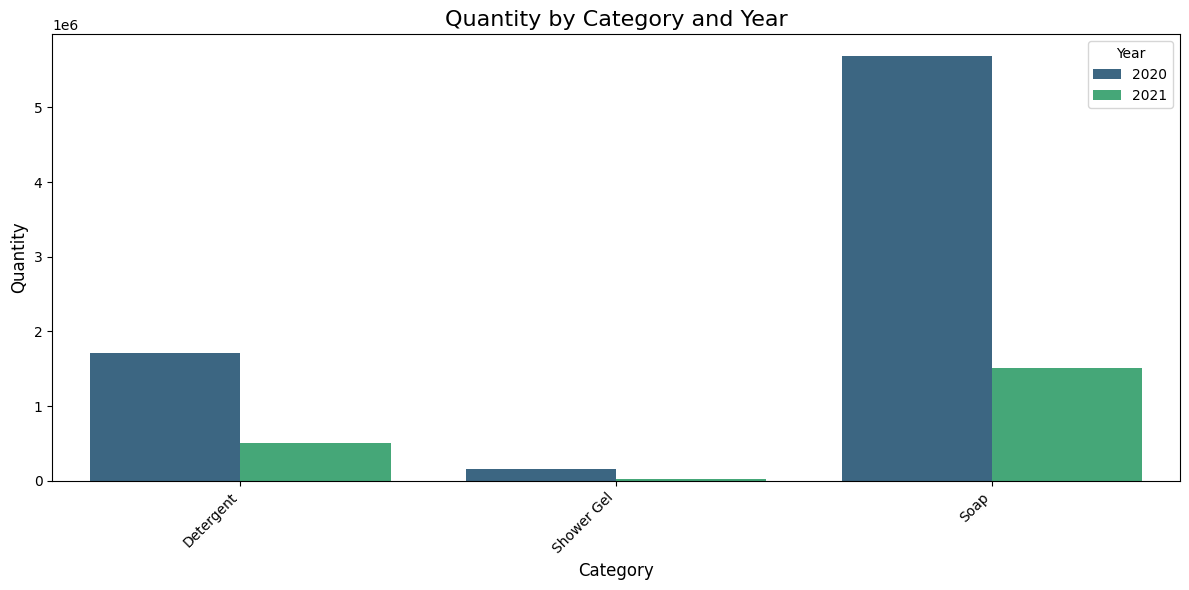

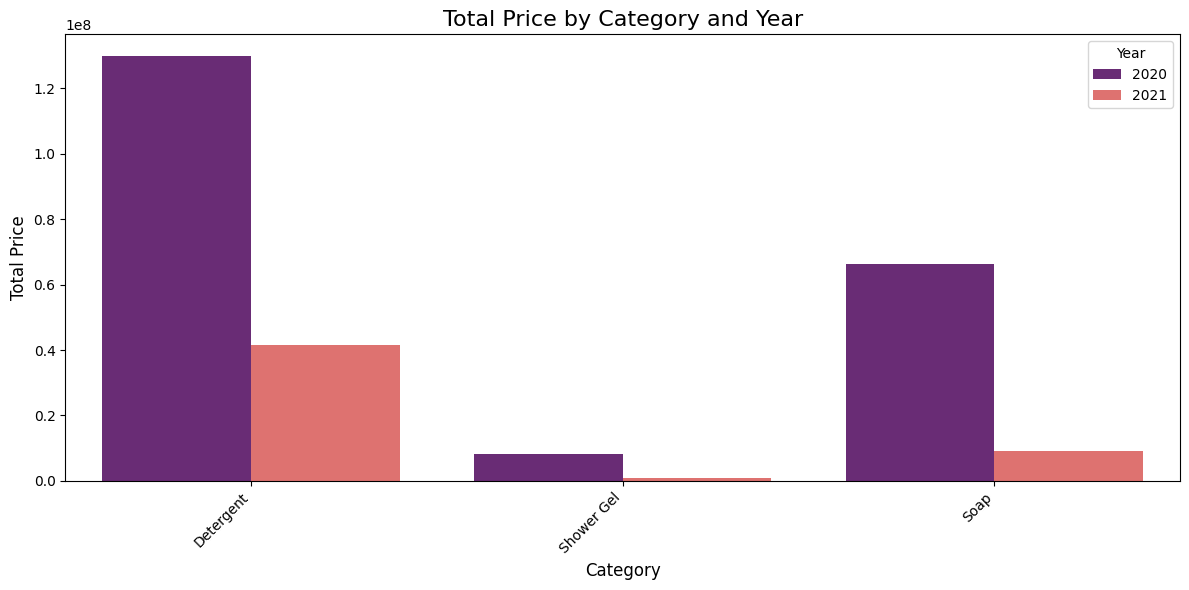

In [58]:
pivot_table_Category = pd.pivot_table(
    data_Sales,
    values=['Quantity', 'Total Price'],
    index=['Category'],
    columns=['Year'],
    aggfunc='sum'
)

pivot_table_Category.columns = [
    f'{metric}_{year}' for metric, year in pivot_table_Category.columns
]

pivot_table_Category = pivot_table_Category.reset_index()

pivot_table_melted = pivot_table_Category.melt(
    id_vars=['Category'],
    var_name='Metric_Year',
    value_name='Value'
)

pivot_table_melted[['Metric', 'Year']] = pivot_table_melted['Metric_Year'].str.split('_', expand=True)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Category',
    y='Value',
    hue='Year',
    data=pivot_table_melted[pivot_table_melted['Metric'] == 'Quantity'],
    palette='viridis'
)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity by Category and Year', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Category',
    y='Value',
    hue='Year',
    data=pivot_table_melted[pivot_table_melted['Metric'] == 'Total Price'],
    palette='magma'
)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.title('Total Price by Category and Year', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [59]:
pivot_table_Category_month = pd.pivot_table(data_Sales,
                                   values=['Quantity','Total Price'],
                                    columns=['Category'],
                                   index=['Year',"Month"],
                                   aggfunc='sum')
pivot_table_Category_month

Quantity                      Total Price                         
Category   Detergent Shower Gel     Soap    Detergent  Shower Gel         Soap
Year Month                                                                    
2020 1         86186       2887    99245   8151496.75   128962.67    535395.14
     2        136664      15836   302151  13209762.23   704301.84   4684683.35
     3        172707      74776  1041804   9884826.20  3972554.64  14537082.20
     4        124696      35450   597232   9515124.20  1864619.78   8309285.30
     5         71864       3040   344977   3604715.10   145151.40   3926260.27
     6        179124       8685   551298  13142106.28   450183.09   7040870.33
     7        201640       5978   431891  14907168.87   322520.50   6241628.52
     8        152338       3558   472281  10418119.15   191594.38   6903357.89
     9        128198       2146   495834   9362615.02   117071.28   5049556.48
     10       188778       3964   530495  15533528.31   204971.22   3842018.41
     11       163741       3675   490470  13402077.86   170094.13   3006892.28
     12       110975       1938   335381   8891729.00    87506.36   2129507.97
2021 1        134851       4102   403512  10605672.90   202155.68   2506048.91
     2        129561       5642   386180  10990972.12   263187.64   2574015.96
     3        166700       6853   484607  13547209.99   329614.69   2820305.65
     4         74629       4457   237544   6356692.20   202484.23   1374168.86

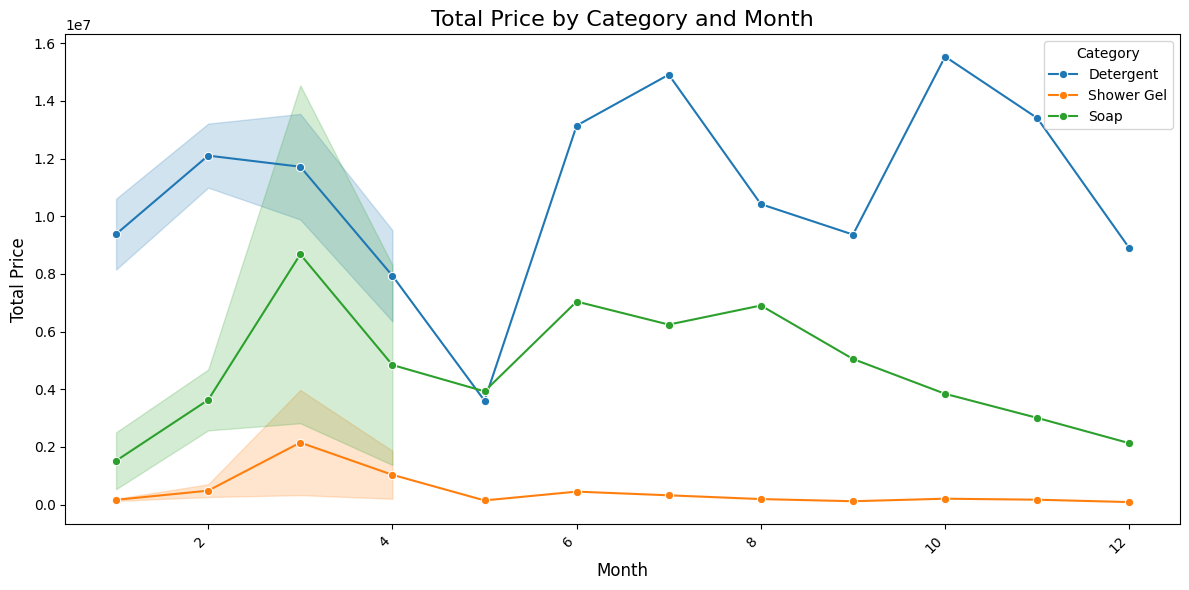

In [60]:

pivot_table_Category_month = pd.pivot_table(data_Sales,
                                   values='Total Price',
                                   index=['Year', 'Month'],
                                   columns=['Category'],
                                   aggfunc='sum')

pivot_table_Category_month = pivot_table_Category_month.reset_index()

pivot_table_melted = pivot_table_Category_month.melt(
    id_vars=['Year', 'Month'],
    var_name='Category',
    value_name='Total Price'
)

plt.figure(figsize=(12, 6))
sns.lineplot(x="Month", y="Total Price", hue="Category", data=pivot_table_melted, marker='o')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.title('Total Price by Category and Month', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


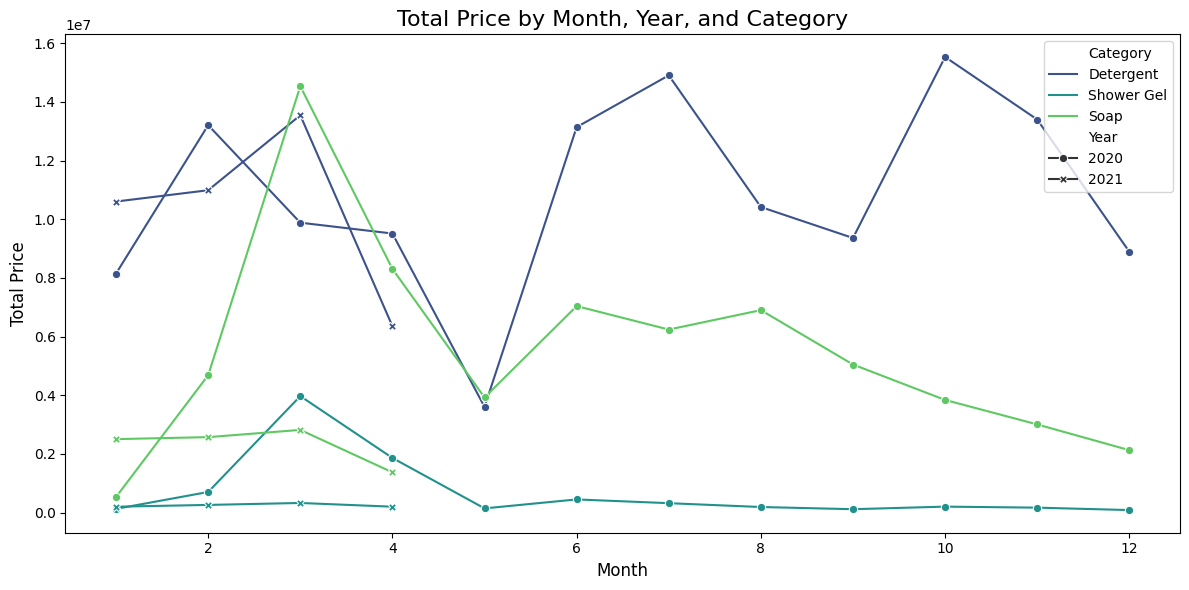

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the pivot table
pivot_table_Category_month = pd.pivot_table(
    data_Sales,
    values='Total Price',
    index=['Year', 'Month'],
    columns=['Category'],
    aggfunc='sum'
)
pivot_table_Category_month = pivot_table_Category_month.reset_index()

pivot_table_melted = pivot_table_Category_month.melt(
    id_vars=['Year', 'Month'],
    var_name='Category',
    value_name='Total Price'
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month',
    y='Total Price',
    hue='Category',
    style='Year',
    data=pivot_table_melted,
    palette='viridis',
    markers=True,
    dashes=False
)

plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.title('Total Price by Month, Year, and Category', fontsize=16)

plt.tight_layout()
plt.show()

In [62]:

  pivot_table_Quantity = pd.pivot_table(data_Sales, values=['Quantity'], index=['PRODUCT_CODE', 'Product Name'], columns=['Year'], aggfunc='sum')
  pivot_table_Quantity


Quantity        
Year                                                         2020    2021
PRODUCT_CODE Product Name                                                
11419        Soap 85gm - blue                               10409    1063
14599        Detergent 750ml                                 1583      83
14778        SG Red 300 ml Red 2 pcs with 50% discount      40636      64
18730        Soap 115gm - yellow                           455519    1161
22134        Soap 125gm - Red                              279540   34693
24050        Soap 85gm - 24pcs Normal                      345652  152849
25237        Soap 165gm - Red 4 pcs 4 EGP Discount         368230    2875
27977        Soap 165gm - yellow                            71949   12400
29213        Soap 165gm - blue 4 pcs 4 EGP Discount            47    2844
29944        Soap 85gm Red 4 pcs - 3 EGP Discount            4723     989
32354        Detergent 1L                                    1446      37
32787        Soap 85gm Normal 4 pcs - 3 EGP Discount         9550    4005
35742        SG 300ml Fresh 2 Pcs with 50% discount          5322    4034
38028        Soap 115gm - Normal                             9154    2061
39671        Soap 165gm - Normal                           148698   44017
41850        Detergent 500ml discounted 10%                371102   92351
42400        Detergent 750ml                                  383    1024
44449        SG yellow 300 ml                                2635    1055
44871        Soap 115gm - blue 4 pcs 4 EGP Discount         11265    4392
46375        Soap 60gm - yellow                            257857  100687
46533        Soap 85gm - yellow                             12847    1313
52554        Soap 125gm - Normal                           302814   32081
52568        SG blue 300 ml blue 2 pcs with 50% discount    68948      51
53774        Detergent 500ml                                68448     816
55894        Soap 165gm - Normal 4 pcs 4EGP Discount       497581   21544
56345        SG blue 300 ml                                 11064     955
60001        Soap 60gm - Red                               696490  136990
63261        Detergent 500ml 2 pcs with 50% discount           25    1344
70804        Detergent 245ml                                24387   10935
71913        Soap 115gm - yellow 4 pcs 4 EGP Discount        1705     678
72557        Soap 115gm - Normal 4 pcs 4EGP Discount        10465     580
73955        SG 300ml Normal 2 Pcs with 50% discount        11043    2642
74058        SG Red 300 ml                                   1393      56
74501        Detergent 235ml                                34013    8522
74527        Detergent 50ml                                531200  156639
75443        Soap 125gm - blue                              20048    4731
77034        Soap 115gm - Red                               12075    1811
77397        Soap 60gm - Normal                            580721  228649
78236        Soap 165gm - blue                              21357    3507
82733        Soap 85gm - Red                               623339  304284
82910        Detergent 1L discounted 10%                   350536  128588
83150        Soap 85gm - Normal                             16114    4296
84712        Soap 165gm - yellow 4 pcs 4 EGP Discount       64727   10835
84998        Soap 115gm - blue                               2091      60
90059        Soap 115gm - Red 4 pcs 4 EGP Discount           5418    6038
90274        SG 300ml                                       20892   12197
91553        Soap 60gm - blue                              690415  329393
96938        Detergent 120ml                               333788  105402
98761        Soap 165gm - Red                              143732   56327
99185        Soap 125gm - yellow                            18527    4690

<ipython-input-63-8f505c986a0a>:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pivot_table_quantity_long = pivot_table_quantity.stack().reset_index()


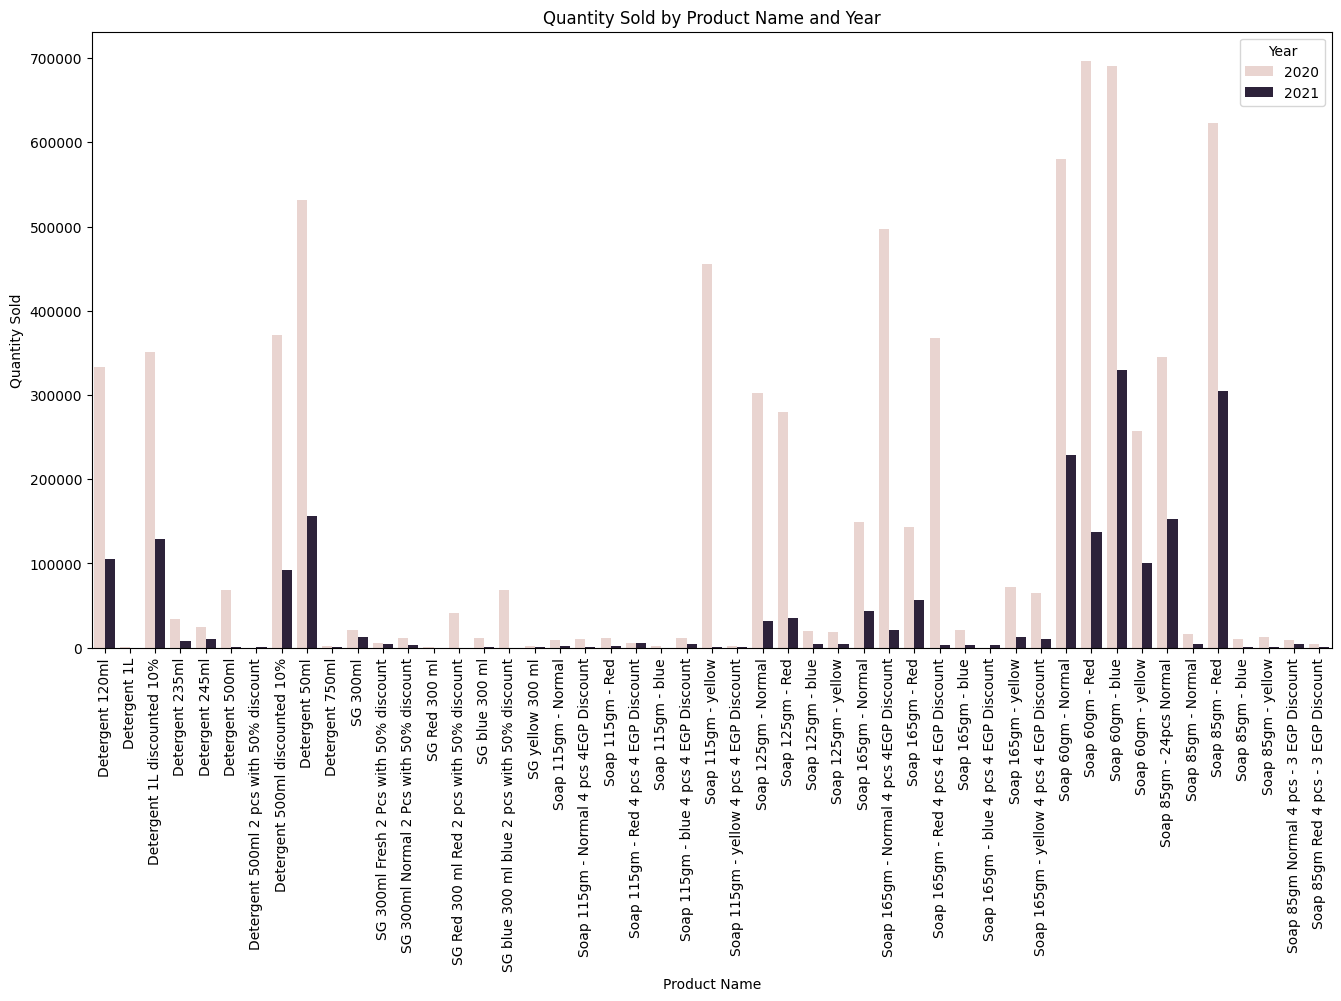

In [63]:

pivot_table_quantity = pd.pivot_table(data_Sales, values=['Quantity'], index=['Product Name'], columns=['Year'], aggfunc='sum')

pivot_table_quantity_long = pivot_table_quantity.stack().reset_index()
pivot_table_quantity_long.columns = ['Product Name', 'Year', 'Quantity']

plt.figure(figsize=(16, 8))
sns.barplot(x='Product Name', y='Quantity', hue='Year', data=pivot_table_quantity_long)
plt.title('Quantity Sold by Product Name and Year')
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.show()


<ipython-input-64-dc68802f3539>:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pivot_table_quantity_long = pivot_table_quantity.stack().reset_index()


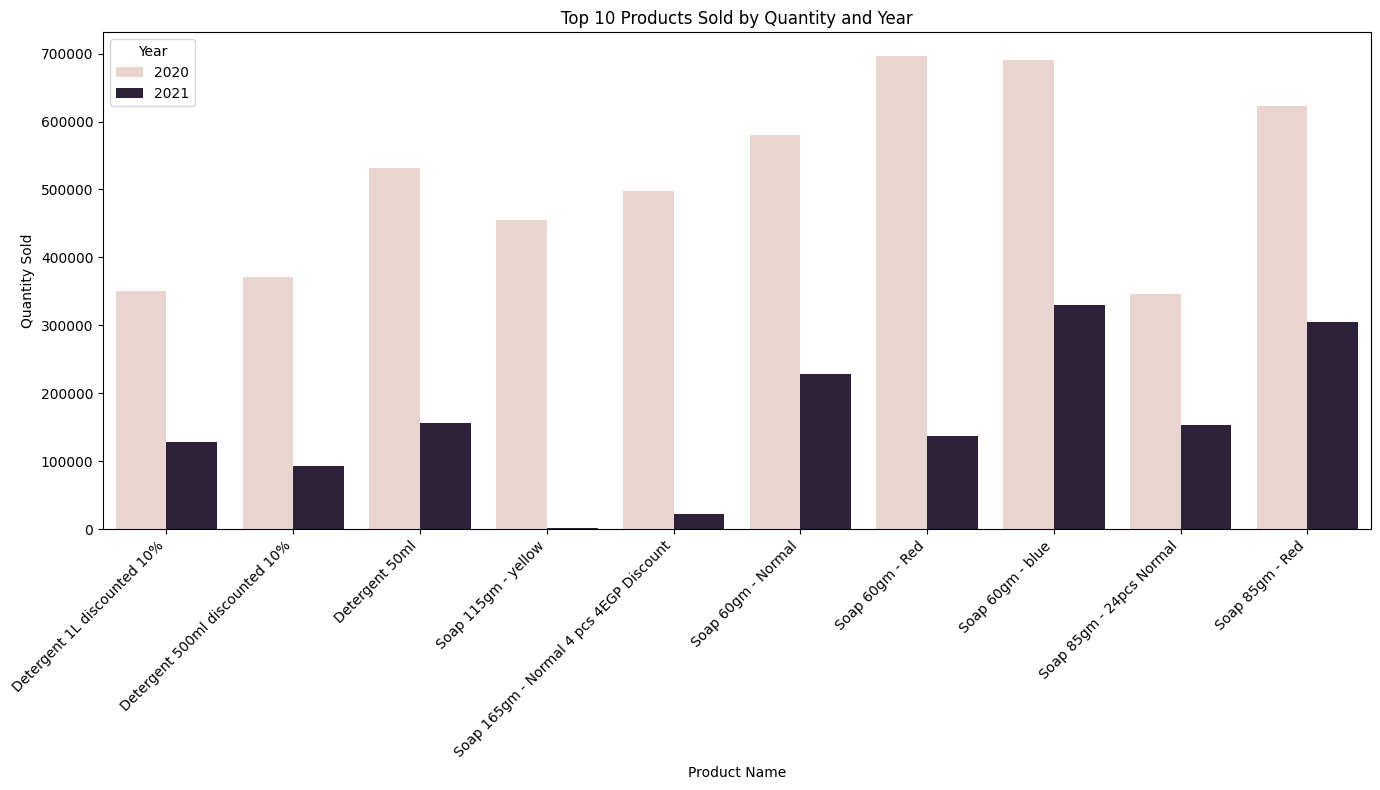

In [64]:

pivot_table_quantity = pd.pivot_table(data_Sales, values=['Quantity'], index=['Product Name'], columns=['Year'], aggfunc='sum')

pivot_table_quantity_long = pivot_table_quantity.stack().reset_index()
pivot_table_quantity_long.columns = ['Product Name', 'Year', 'Quantity']

top_10_products = pivot_table_quantity_long.groupby('Product Name')['Quantity'].sum().nlargest(10).index
top_10_data = pivot_table_quantity_long[pivot_table_quantity_long['Product Name'].isin(top_10_products)]

plt.figure(figsize=(14, 8))
sns.barplot(x='Product Name', y='Quantity', hue='Year', data=top_10_data)
plt.title('Top 10 Products Sold by Quantity and Year')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [65]:

pivot_table_price_year = pd.pivot_table(data_Sales, values=['Total Price'], index=['Product Name'], columns=['Year'], aggfunc='sum')
pivot_table_price_year

Total Price             
Year                                                2020         2021
Product Name                                                         
Detergent 120ml                               6622353.92   2091175.68
Detergent 1L                                   204999.42      5245.49
Detergent 1L discounted 10%                  69416644.08  25464281.64
Detergent 235ml                               1314942.58    329460.52
Detergent 245ml                                943045.29    422856.45
Detergent 500ml                               5089793.28     60677.76
Detergent 500ml 2 pcs with 50% discount          2974.00    159882.24
Detergent 500ml discounted 10%               17749808.66   4417148.33
Detergent 50ml                               28451072.00   8389584.84
Detergent 750ml                                227635.74    160234.26
SG 300ml                                       853020.36    498003.51
SG 300ml Fresh 2 Pcs with 50% discount         325972.50    247082.50
SG 300ml Normal 2 Pcs with 50% discount        676383.75    161822.50
SG Red 300 ml                                   56876.19      2286.48
SG Red 300 ml Red 2 pcs with 50% discount     2183372.28      3438.72
SG blue 300 ml                                 451743.12     38992.65
SG blue 300 ml blue 2 pcs with 50% discount   3704576.04      2740.23
SG yellow 300 ml                               107587.05     43075.65
Soap 115gm - Normal                             76252.82     17168.13
Soap 115gm - Normal 4 pcs 4EGP Discount        327868.45     18171.40
Soap 115gm - Red                               100584.75     15085.63
Soap 115gm - Red 4 pcs 4 EGP Discount          169745.94    189170.54
Soap 115gm - blue                               17418.03       499.80
Soap 115gm - blue 4 pcs 4 EGP Discount         352932.45    137601.36
Soap 115gm - yellow                           3794473.27      9671.13
Soap 115gm - yellow 4 pcs 4 EGP Discount        53417.65     21241.74
Soap 125gm - Normal                           2522440.62    267234.73
Soap 125gm - Red                              2328568.20    288992.69
Soap 125gm - blue                              166999.84     39409.23
Soap 125gm - yellow                            154329.91     39067.70
Soap 165gm - Normal                           1610399.34    476704.11
Soap 165gm - Normal 4 pcs 4EGP Discount      20565022.73    890413.52
Soap 165gm - Red                              1556617.56    610021.41
Soap 165gm - Red 4 pcs 4 EGP Discount        15218945.90    118823.75
Soap 165gm - blue                              231296.31     37980.81
Soap 165gm - blue 4 pcs 4 EGP Discount           1942.51    117542.52
Soap 165gm - yellow                            779207.67    134292.00
Soap 165gm - yellow 4 pcs 4 EGP Discount      2675166.91    447810.55
Soap 60gm - Normal                            2032523.50    800271.50
Soap 60gm - Red                               2437715.00    479465.00
Soap 60gm - blue                              2416452.50   1152875.50
Soap 60gm - yellow                             902499.50    352404.50
Soap 85gm - 24pcs Normal                      1873433.84    828441.58
Soap 85gm - Normal                              87337.88     23284.32
Soap 85gm - Red                               3378497.38   1649219.28
Soap 85gm - blue                                56416.78      5761.46
Soap 85gm - yellow                              69630.74      7116.46
Soap 85gm Normal 4 pcs - 3 EGP Discount        222801.50     93436.65
Soap 85gm Red 4 pcs - 3 EGP Discount            25598.66      5360.38

<ipython-input-66-4365bca6a252>:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pivot_table_price_year_long = pivot_table_price_year.stack().reset_index()


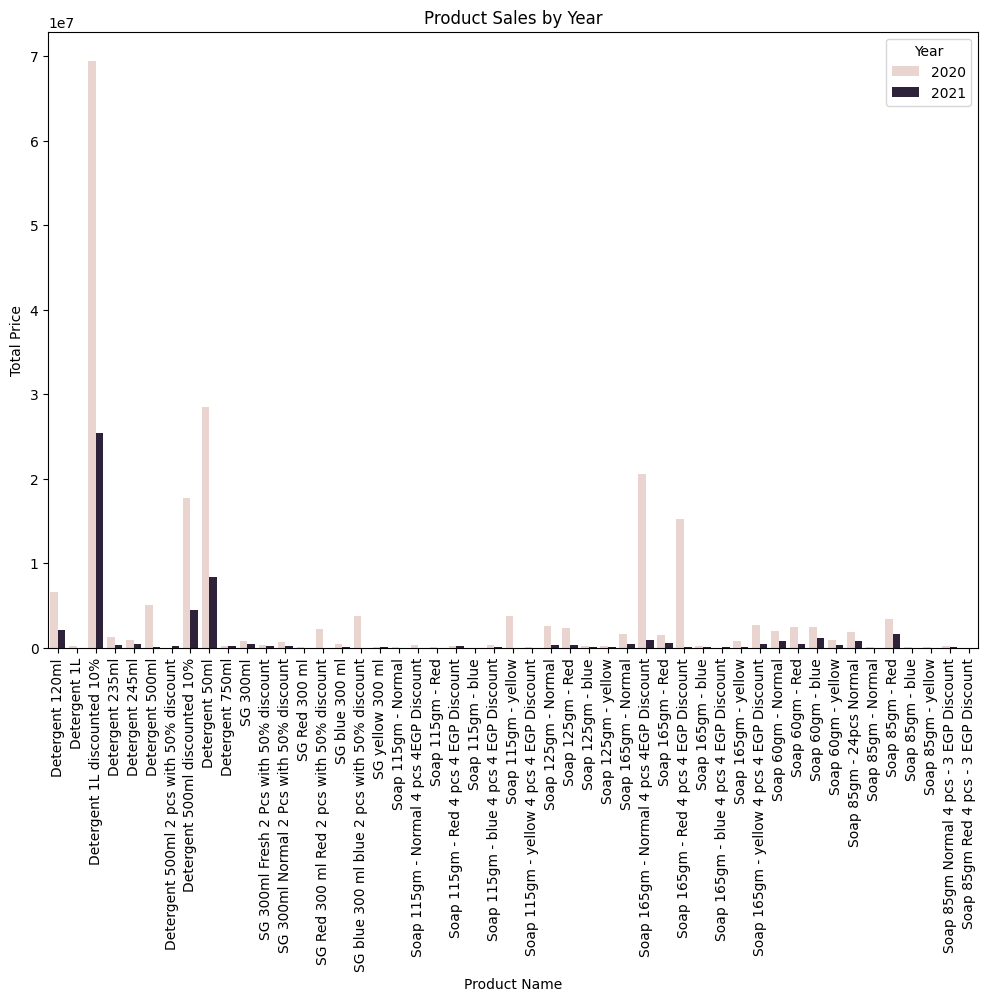

In [66]:

pivot_table_price_year = pd.pivot_table(data_Sales, values=['Total Price'], index=['Product Name'], columns=['Year'], aggfunc='sum')

pivot_table_price_year_long = pivot_table_price_year.stack().reset_index()
pivot_table_price_year_long.columns = ['Product Name', 'Year', 'Total Price']

plt.figure(figsize=(12, 8))
sns.barplot(x='Product Name', y='Total Price', hue='Year', data=pivot_table_price_year_long)
plt.title('Product Sales by Year')
plt.xticks(rotation=90)
plt.show()

<ipython-input-67-0c9fc740aa56>:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pivot_table_price_year_long = pivot_table_price_year.stack().reset_index()


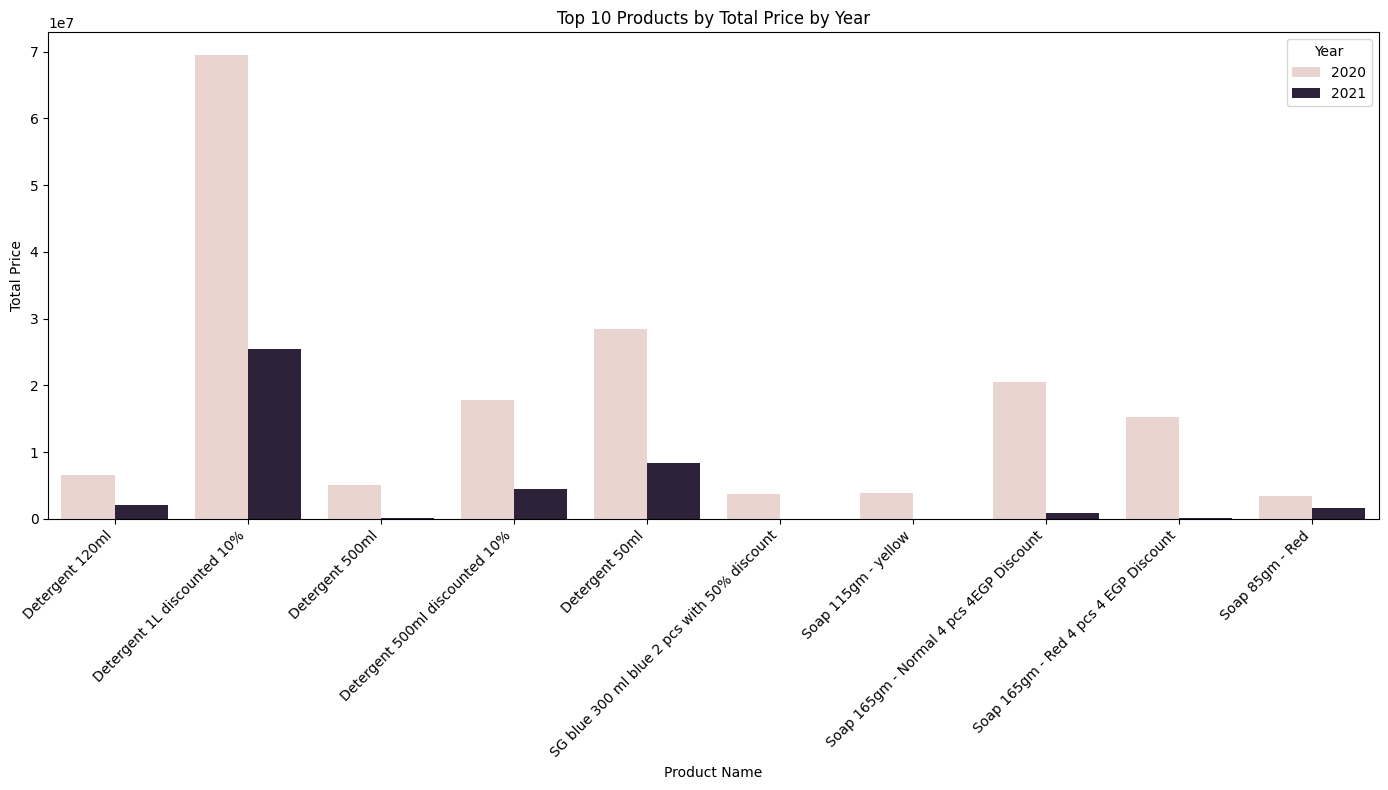

In [67]:

pivot_table_price_year = pd.pivot_table(data_Sales, values=['Total Price'], index=['Product Name'], columns=['Year'], aggfunc='sum')

pivot_table_price_year_long = pivot_table_price_year.stack().reset_index()
pivot_table_price_year_long.columns = ['Product Name', 'Year', 'Total Price']

top_10_products = pivot_table_price_year_long.groupby('Product Name')['Total Price'].sum().nlargest(10).index
top_10_data = pivot_table_price_year_long[pivot_table_price_year_long['Product Name'].isin(top_10_products)]

plt.figure(figsize=(14, 8))
sns.barplot(x='Product Name', y='Total Price', hue='Year', data=top_10_data)
plt.title('Top 10 Products by Total Price by Year')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Name')
plt.ylabel('Total Price')
plt.legend(title='Year')
plt.tight_layout()
plt.show()


In [68]:

pivot_table_sales = pd.pivot_table(data_Sales,
                                   values='Total Price',
                                   columns=['Year'],
                                   index=['Sub_Db_Name'],
                                   aggfunc='sum',
                                   )

pivot_table_sales

Year,2020,2021
Sub_Db_Name,,
DB 1,41045808.34,10001249.18
DB 2,17595036.19,4009620.89
DB 3,44943817.67,11526152.84
DB 4,44472170.22,11903381.02
DB 5,12128055.67,3272199.75
DB 6,13784233.57,2733334.88
DB 7,30620216.74,8326590.27


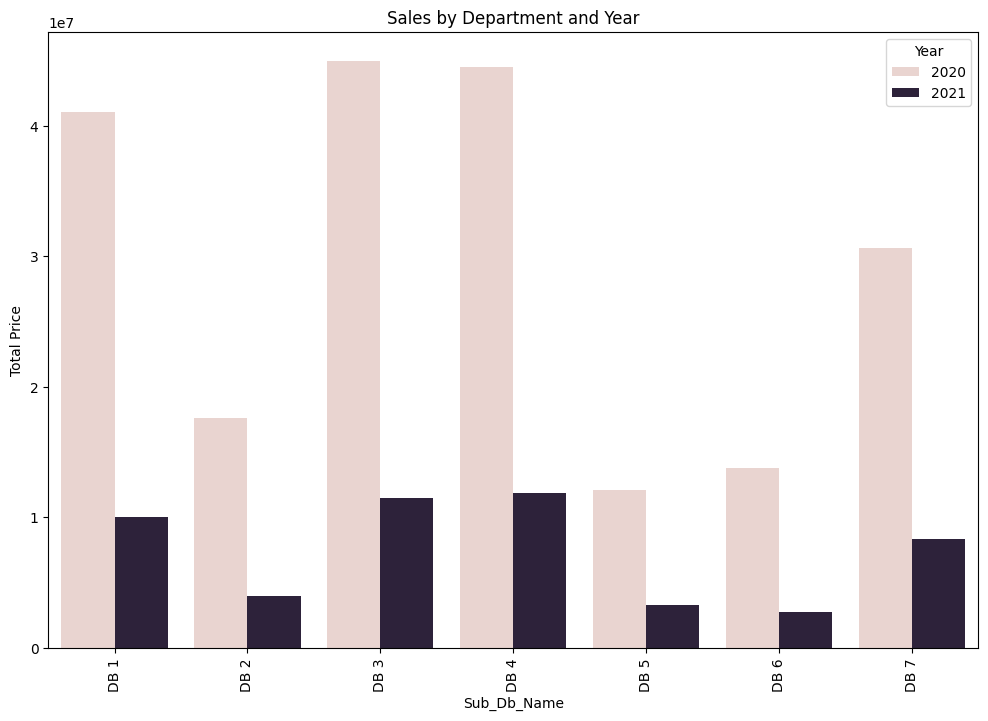

In [69]:

pivot_table_sales_long = pivot_table_sales.stack().reset_index()
pivot_table_sales_long.columns = ['Sub_Db_Name', 'Year', 'Total Price']

plt.figure(figsize=(12, 8))
sns.barplot(x='Sub_Db_Name', y='Total Price', hue='Year', data=pivot_table_sales_long)
plt.title('Sales by Department and Year')
plt.xticks(rotation=90)
plt.show()

In [70]:

pivot_table_sales_username = pd.pivot_table(data_Sales,
                                   values='Total Price',
                                   index=['Sub_Db_Name',"Name_Of_The_User"],
                                   aggfunc='sum',
                                   )

pivot_table_sales_username

Total Price
Sub_Db_Name Name_Of_The_User             
DB 1        Mohamed Hussein   26279832.67
            Rep 13            24767224.85
DB 2        Thabet Ali        21604657.08
DB 3        Amgad Mohsen      16444864.40
            Amir              21750556.47
            Rep 14            18274549.64
DB 4        Amgad             29139597.08
            Baher             27235954.16
DB 5        Omar              15400255.42
DB 6        Yasser            16517568.45
DB 7        Mohammed Ahmed    14040779.80
            Osama             24906027.21

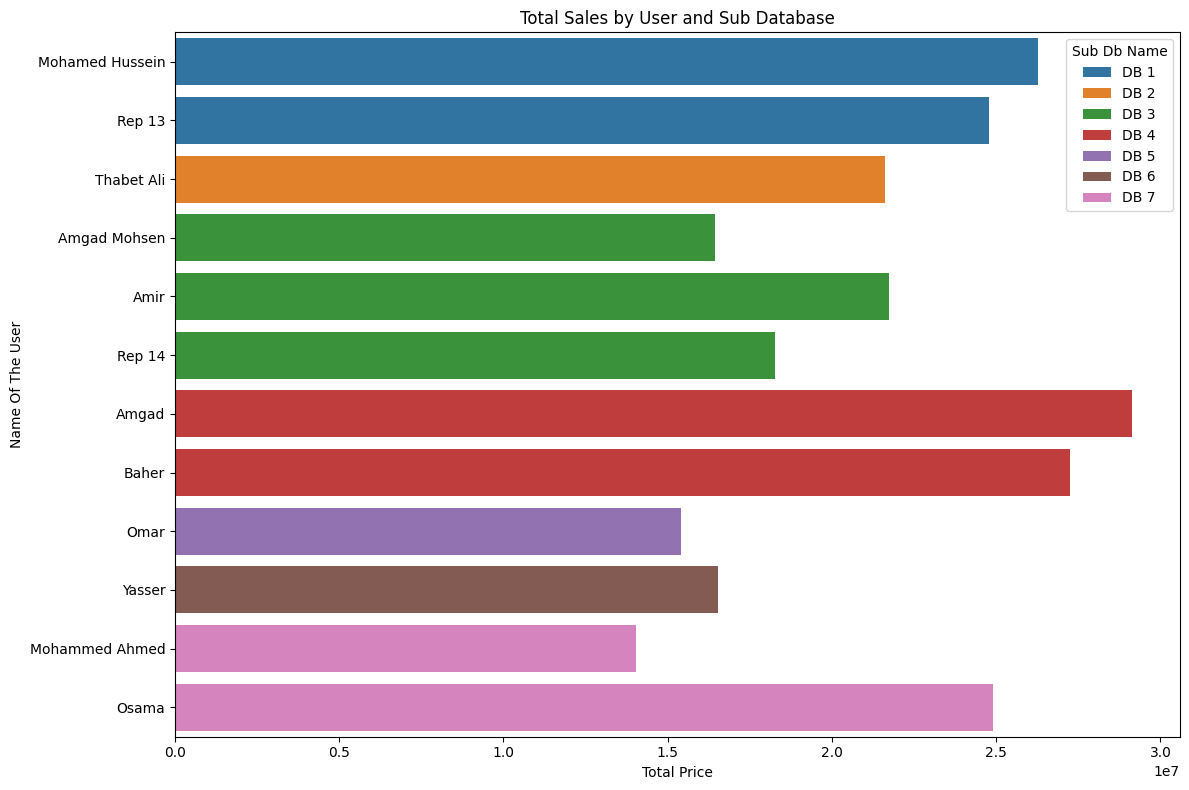

In [71]:

pivot_table_sales_username_long = pivot_table_sales_username.reset_index()
pivot_table_sales_username_long.columns = ['Sub_Db_Name', 'Name_Of_The_User', 'Total Price']

plt.figure(figsize=(12, 8))
sns.barplot(x='Total Price', y='Name_Of_The_User', hue='Sub_Db_Name', data=pivot_table_sales_username_long)
plt.title('Total Sales by User and Sub Database')
plt.xlabel('Total Price')
plt.ylabel('Name Of The User')
plt.legend(title='Sub Db Name')
plt.tight_layout()
plt.show()


In [72]:

pivot_table_sales_username_year = pd.pivot_table(data_Sales,
                                   values='Total Price',
                                   columns=['Year'],
                                   index=['Sub_Db_Name',"Name_Of_The_User"],
                                   #index=["PRODUCT_CODE","Product Name,
                                   aggfunc='sum',
                                   )

pivot_table_sales_username_year

Year                                 2020        2021
Sub_Db_Name Name_Of_The_User                         
DB 1        Mohamed Hussein   21065263.35  5214569.32
            Rep 13            19980544.99  4786679.86
DB 2        Thabet Ali        17595036.19  4009620.89
DB 3        Amgad Mohsen      13414747.05  3030117.35
            Amir              17108861.09  4641695.38
            Rep 14            14420209.53  3854340.11
DB 4        Amgad             23676766.54  5462830.54
            Baher             20795403.68  6440550.48
DB 5        Omar              12128055.67  3272199.75
DB 6        Yasser            13784233.57  2733334.88
DB 7        Mohammed Ahmed    11944483.60  2096296.20
            Osama             18675733.14  6230294.07

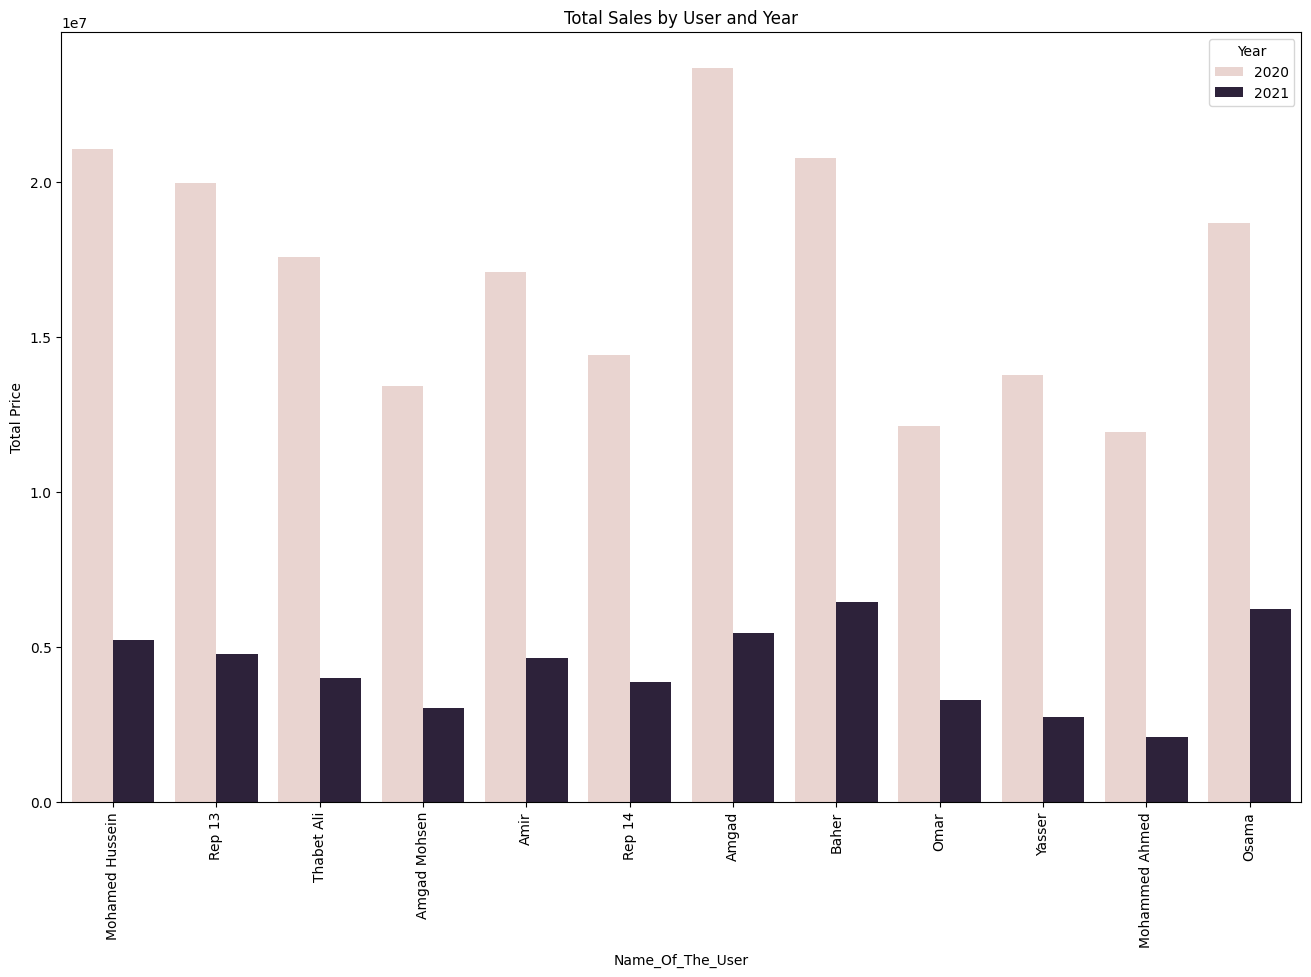

In [73]:

pivot_table_sales_username_year_long = pivot_table_sales_username_year.stack().reset_index()
pivot_table_sales_username_year_long.columns = ['Sub_Db_Name', 'Name_Of_The_User', 'Year', 'Total Price']

plt.figure(figsize=(16, 10))
sns.barplot(x='Name_Of_The_User', y='Total Price', hue='Year', data=pivot_table_sales_username_year_long)
plt.title('Total Sales by User and Year')
plt.xticks(rotation=90)
plt.show()

# **Data Outlets**

In [74]:
file_path = "/content/Outlets.csv"
col_types={
    "Employee_Code":str,
    "Warehouse Code":str,
    "Outlet Code":str,

}
data_outlet = pd.read_csv(file_path,dtype=col_types)
data_outlet.head(3)

,OutletId,Outlet Name,Outlet Class,Outlet Type,Employee_Code,Employee_Name,Warehouse Code,Warehouse Name
0,1,ابو السعود,تجزئه- بقالة,تجزئه,3,Amgad Mohsen,12422,DB 3
1,2,ابو العز,تجزئه- بقالة,تجزئه,9,محمد احمد,39145,DB 7
2,3,ابو حسن السورى,تجزئه- بقالة,تجزئه,11,Rep 13,14856,DB 1


# **Explore Data**

In [75]:
translation_map = {
    'تجزئة':'Retail',
    'تجزئه': 'Retail',
    'جمله': 'Wholesale'
}

data_outlet['Outlet Type'] = data_outlet['Outlet Type'].replace(translation_map)


In [76]:
data_outlet["Employee_Code"].unique()

array(['3', '9', '11', '1', '2', '7', '4', '10', '12', '5', '6', '8'],
      dtype=object)

In [77]:
data_outlet["Warehouse Code"].unique()

array(['12422', '39145', '14856', '60722', '99510', '13887', '27753'],
      dtype=object)

In [78]:

data_Warehouses.head(20)

,Warehouse Name,Code,Region
0,DB 1,14856,Delta
1,DB 2,60722,Delta
2,DB 3,12422,Upper
3,DB 4,99510,Delta
4,DB 5,13887,Cairo/Giza
5,DB 6,27753,Delta
6,DB 7,39145,Upper


In [79]:
data_outlet = data_outlet.rename(columns={"Warehouse Code" : "Code"})

In [80]:

data_outlet['Region'] = np.where(
    data_outlet['Code'].isin(['14856', '60722', '99510', '27753']), 'Delta',
    np.where(
        data_outlet['Code'].isin(['12422', '39145']), 'Upper',
        np.where(
            data_outlet['Code'] == '13887', 'Cairo/Giza', 'Unknown'
        )
    )
)

print(data_outlet)

      OutletId     Outlet Name   Outlet Class Outlet Type Employee_Code  \
0            1      ابو السعود   تجزئه- بقالة      Retail             3   
1            2        ابو العز   تجزئه- بقالة      Retail             9   
2            3  ابو حسن السورى   تجزئه- بقالة      Retail            11   
3            4        ابو خالد   تجزئه- بقالة      Retail             1   
4            5  ابو وائل ماركت   تجزئه- بقالة      Retail             3   
...        ...             ...            ...         ...           ...   
5161      5162            محمد   تجزئه- بقالة      Retail             3   
5162      5163     منظفات طيبه  تجزئه- منظفات      Retail            12   
5163      5164    هايبر الجمله   تجزئه- بقالة      Retail            11   
5164      5165          الشهاب   تجزئه- بقالة      Retail             8   
5165      5166    اولاد حسانين    جمله منظفات   Wholesale             9   

        Employee_Name   Code Warehouse Name Region  
0        Amgad Mohsen  12422           DB 3  U

In [81]:
data_outlet["Region"].unique()

array(['Upper', 'Delta', 'Cairo/Giza'], dtype=object)

In [82]:
data_outlet["Outlet Type"].unique()

array(['Retail', 'Wholesale'], dtype=object)

In [83]:
data_outlet["Outlet Name"].nunique()

4137

In [84]:
data_outlet["Outlet Class"].unique()

array(['تجزئه- بقالة', 'جمله غذائى', 'تجزئه- منظفات', 'جمله منظفات'],
      dtype=object)

In [85]:
# تجزئه- بقالة: Retail - Grocery
# جمله غذائى: Wholesale - Food
# تجزئه- منظفات: Retail - Cleaning Products
# جمله- منظفات: Wholesale - Cleaning Products

In [86]:
data_outlet["Outlet Class"]=data_outlet["Outlet Class"].str.replace("تجزئه- بقالة","Retail-Grocery")
data_outlet["Outlet Class"]=data_outlet["Outlet Class"].str.replace('جمله غذائى',"Wholesale-Food")
data_outlet["Outlet Class"]=data_outlet["Outlet Class"].str.replace("تجزئه- منظفات","Retail-Cleaning Products")
data_outlet["Outlet Class"]=data_outlet["Outlet Class"].str.replace("جمله منظفات","Wholesale-Cleaning Products")

In [87]:
data_outlet["Outlet Class"].unique()

array(['Retail-Grocery', 'Wholesale-Food', 'Retail-Cleaning Products',
       'Wholesale-Cleaning Products'], dtype=object)

In [88]:
data_outlet["Employee_Name"]=data_outlet["Employee_Name"].str.replace("محمد احمد","Mohammed Ahmed")
data_outlet["Employee_Name"]=data_outlet["Employee_Name"].str.replace("أمير","Amir")

In [89]:
grouped_data = data_outlet.groupby(['Outlet Name', 'Employee_Name', 'Outlet Class'])
grouped_data.size()

Outlet Name    Employee_Name    Outlet Class            
Beauty Woman   Mohamed Hussein  Retail-Cleaning Products    1
Carrefour      Rep 13           Retail-Grocery              1
Good Drink     Amgad Mohsen     Retail-Grocery              1
House Clean    Omar             Retail-Cleaning Products    1
Kinder         Yasser           Retail-Grocery              1
                                                           ..
يوسف للمنظفات  Rep 13           Retail-Cleaning Products    1
يوسف ماركت     Amgad Mohsen     Retail-Grocery              1
               Thabet Ali       Retail-Grocery              1
يولكا          Mohammed Ahmed   Retail-Grocery              1
يونس للمنظفات  Omar             Retail-Cleaning Products    1
Length: 4949, dtype: int64

In [90]:
data_outlet.duplicated().sum()

0

In [91]:
data_outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5166 entries, 0 to 5165
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OutletId        5166 non-null   int64 
 1   Outlet Name     5166 non-null   object
 2   Outlet Class    5166 non-null   object
 3   Outlet Type     5166 non-null   object
 4   Employee_Code   5166 non-null   object
 5   Employee_Name   5166 non-null   object
 6   Code            5166 non-null   object
 7   Warehouse Name  5166 non-null   object
 8   Region          5166 non-null   object
dtypes: int64(1), object(8)
memory usage: 363.4+ KB


In [92]:
group_outlet = data_outlet.groupby("Warehouse Name")
group_outlet.size()

,0
Warehouse Name,
DB 1,878
DB 2,459
DB 3,1279
DB 4,847
DB 5,399
DB 6,426
DB 7,878


In [93]:

grouped_data = data_outlet.groupby(['Warehouse Name', 'Employee_Name', 'Outlet Class'])
grouped_data.size()

Warehouse Name  Employee_Name    Outlet Class               
DB 1            Mohamed Hussein  Retail-Cleaning Products       119
                                 Retail-Grocery                 272
                                 Wholesale-Cleaning Products     18
                                 Wholesale-Food                  38
                Rep 13           Retail-Cleaning Products       111
                                 Retail-Grocery                 278
                                 Wholesale-Cleaning Products     18
                                 Wholesale-Food                  24
DB 2            Thabet Ali       Retail-Cleaning Products       123
                                 Retail-Grocery                 280
                                 Wholesale-Cleaning Products     23
                                 Wholesale-Food                  33
DB 3            Amgad Mohsen     Retail-Cleaning Products        94
                                 Retail-Grocery                 280
                                 Wholesale-Cleaning Products     20
                                 Wholesale-Food                  32
                Amir             Retail-Cleaning Products       117
                                 Retail-Grocery                 259
                                 Wholesale-Cleaning Products     17
                                 Wholesale-Food                  30
                Rep 14           Retail-Cleaning Products       112
                                 Retail-Grocery                 278
                                 Wholesale-Cleaning Products     14
                                 Wholesale-Food                  26
DB 4            Amgad            Retail-Cleaning Products       125
                                 Retail-Grocery                 263
                                 Wholesale-Cleaning Products     18
                                 Wholesale-Food                  16
                Baher            Retail-Cleaning Products       112
                                 Retail-Grocery                 265
                                 Wholesale-Cleaning Products     25
                                 Wholesale-Food                  23
DB 5            Omar             Retail-Cleaning Products       108
                                 Retail-Grocery                 239
                                 Wholesale-Cleaning Products     19
                                 Wholesale-Food                  33
DB 6            Yasser           Retail-Cleaning Products       110
                                 Retail-Grocery                 265
                                 Wholesale-Cleaning Products     18
                                 Wholesale-Food                  33
DB 7            Mohammed Ahmed   Retail-Cleaning Products        98
                                 Retail-Grocery                 258
                                 Wholesale-Cleaning Products     12
                                 Wholesale-Food                  20
                Osama            Retail-Cleaning Products       123
                                 Retail-Grocery                 313
                                 Wholesale-Cleaning Products     23
                                 Wholesale-Food                  31
dtype: int64

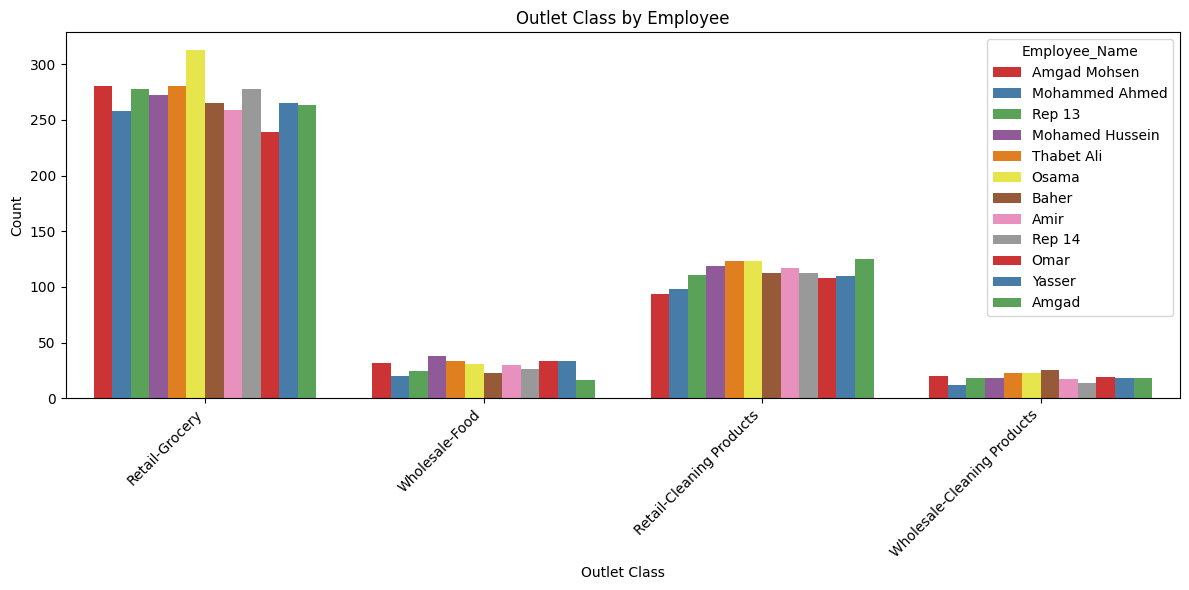

In [94]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Outlet Class', hue='Employee_Name', data=data_outlet, palette='Set1')
plt.title('Outlet Class by Employee')
plt.xlabel('Outlet Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


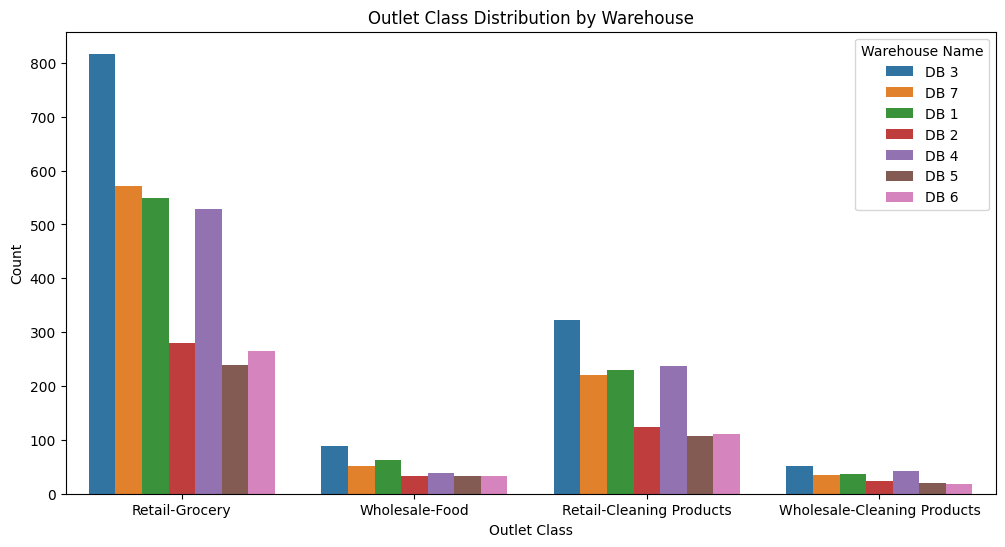

In [95]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Outlet Class', hue='Warehouse Name', data=data_outlet)
plt.title('Outlet Class Distribution by Warehouse')
plt.xlabel('Outlet Class')
plt.ylabel('Count')
plt.show()

In [96]:
grouped_target = data_outlet.groupby(['Outlet Name'])
grouped_target.size()

,0
Outlet Name,
Beauty Woman,1
Carrefour,1
Good Drink,1
House Clean,1
Kinder,1
...,...
يوسف للتجارة,1
يوسف للمنظفات,1
يوسف ماركت,2


In [97]:
grouped_Employee_Name = data_outlet.groupby(['Employee_Name'])
grouped_Employee_Name.size()

,0
Employee_Name,
Amgad,422
Amgad Mohsen,426
Amir,423
Baher,425
Mohamed Hussein,447
Mohammed Ahmed,388
Omar,399
Osama,490
Rep 13,431


In [98]:
data_outlet["OutletId"].nunique()

5166

# Analysis Employee with Active Customer

In [99]:

outlet_employee_counts = data_outlet.groupby('Outlet Name')['Employee_Name'].nunique()
#print(outlet_employee_counts)
df_counts = pd.DataFrame({'Outlet Name': outlet_employee_counts.index, 'Employee Count': outlet_employee_counts.values})
#print(df_counts)
employee_outlet_counts = data_outlet.groupby('Employee_Name')['Outlet Name'].nunique()
#print(employee_outlet_counts)
df_employee_outlet_counts = pd.DataFrame({'Employee Name': employee_outlet_counts.index, 'Outlet Count': employee_outlet_counts.values})
df_employee_outlet_counts

,Employee Name,Outlet Count
0,Amgad,404
1,Amgad Mohsen,412
2,Amir,405
3,Baher,405
4,Mohamed Hussein,417
5,Mohammed Ahmed,365
6,Omar,387
7,Osama,462
8,Rep 13,411
9,Rep 14,399


# Analysis Employee with Active Customer Use Seaborn

<ipython-input-100-0377ebc17b56>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Employee Name', y='Outlet Count', data=df_employee_outlet_counts, palette='viridis')


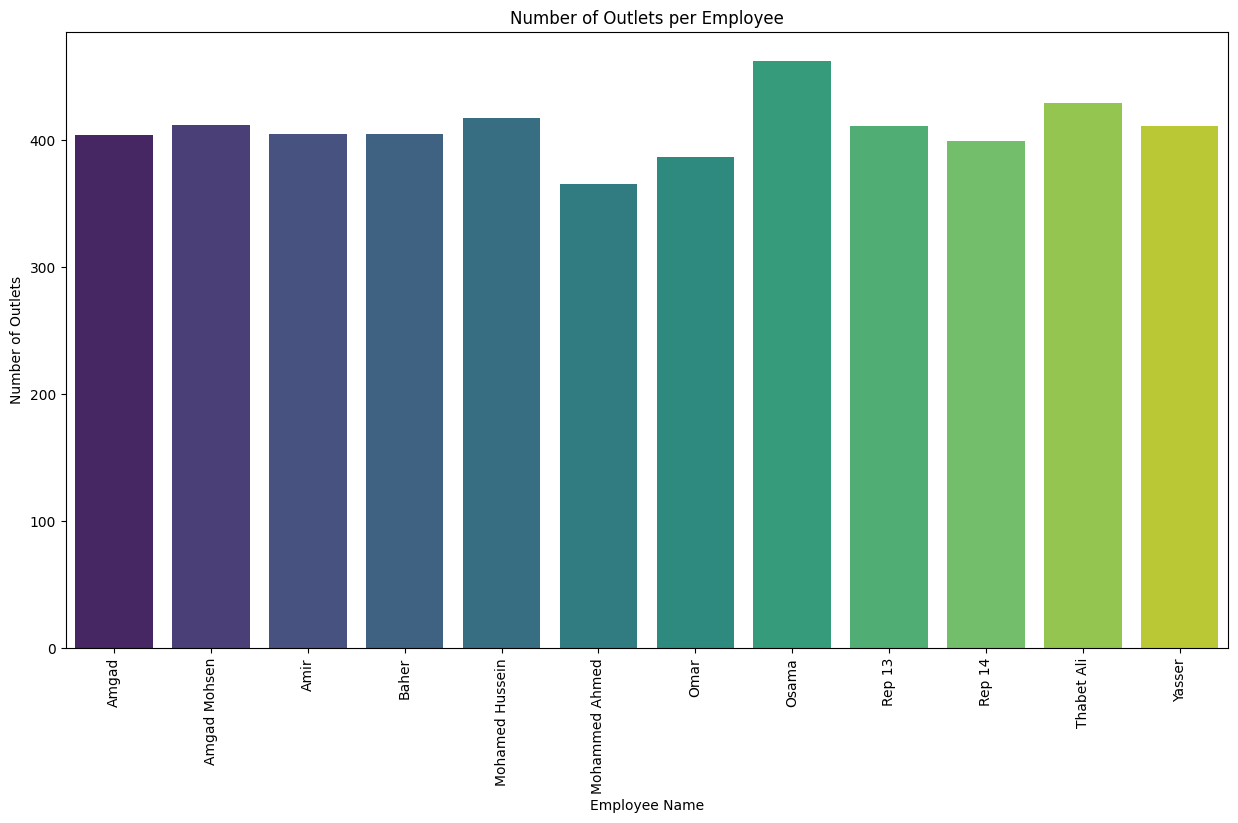

In [100]:

plt.figure(figsize=(15, 8))
sns.barplot(x='Employee Name', y='Outlet Count', data=df_employee_outlet_counts, palette='viridis')
plt.title('Number of Outlets per Employee')
plt.xlabel('Employee Name')
plt.ylabel('Number of Outlets')
plt.xticks(rotation=90)
plt.show()

# Conclusion


### Category: 3 kinds (detergent, shower gel, soap).
### Subcategory:14 kinds
### Product name: 50 kinds
### Analysis Price:
### Detergent's highest price compares with other products.
### Soap less price competes with other products.
### Shower gel average competes with other products.
### Analysis Quantity:
### Shower gel: less quantity competes with other products.
### Detergent: average quantity compares with other products.
### Soap: highest quantity competes with other products.
### Outlet Class: 4 kinds:
#####  ('Retail-Grocery', 'Wholesale-Food', 'Retail-Cleaning Products',
#####  Wholesale-Cleaning Products')


# EDA Top 10 Total Price

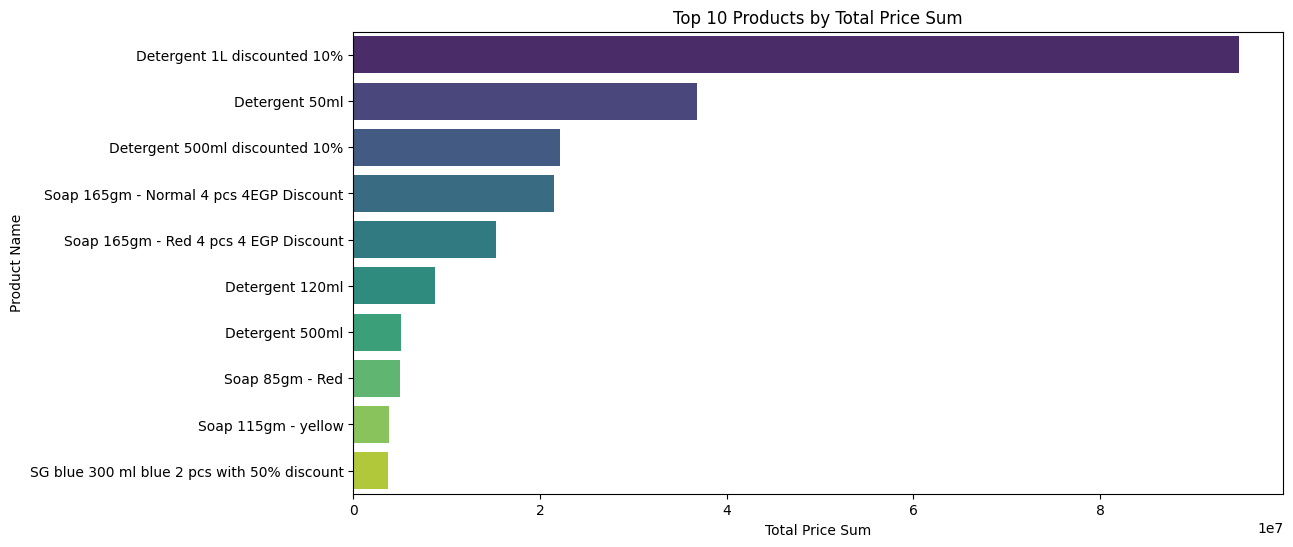

# EDA Top 10 Quantity  During Year

Analysis Quantity During Year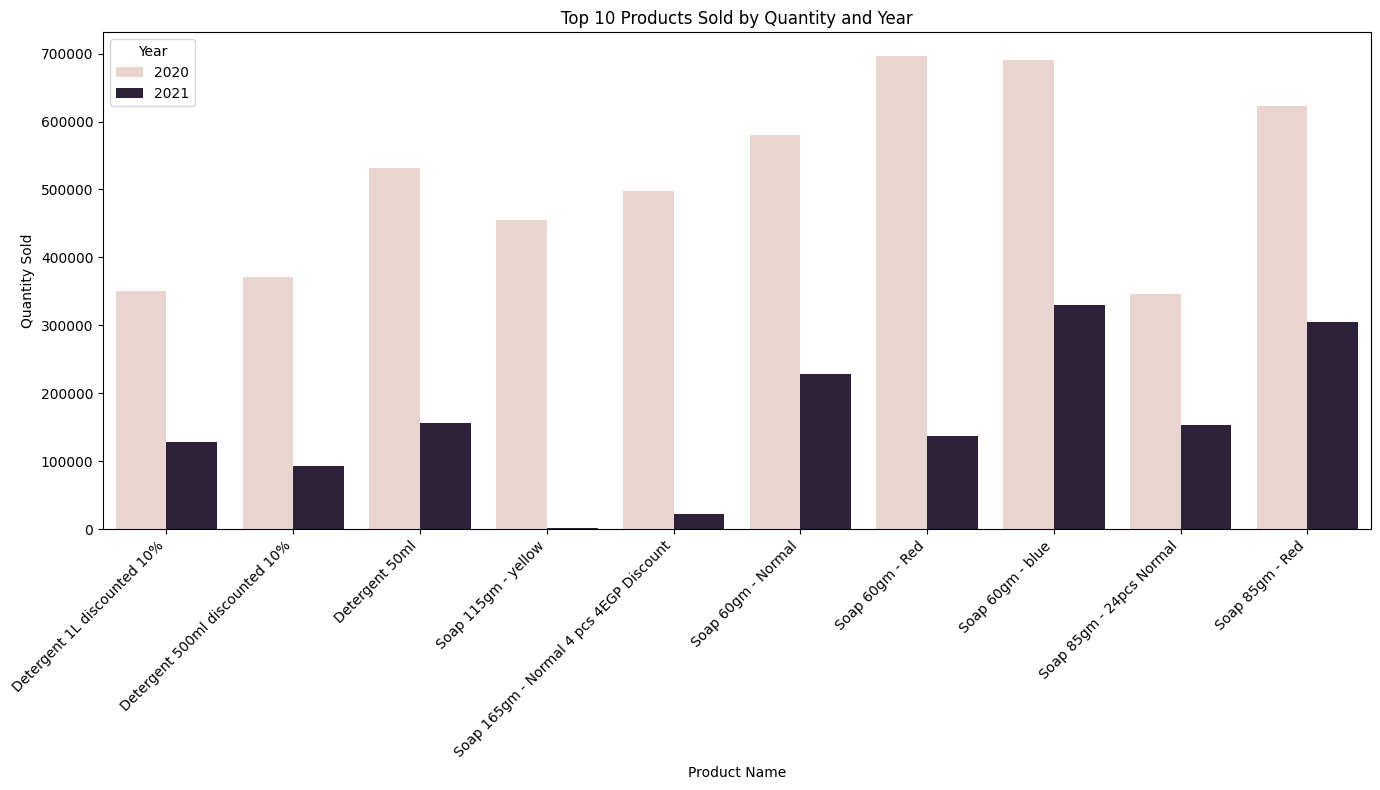

# Analysis Top 10 Total  Price During Year

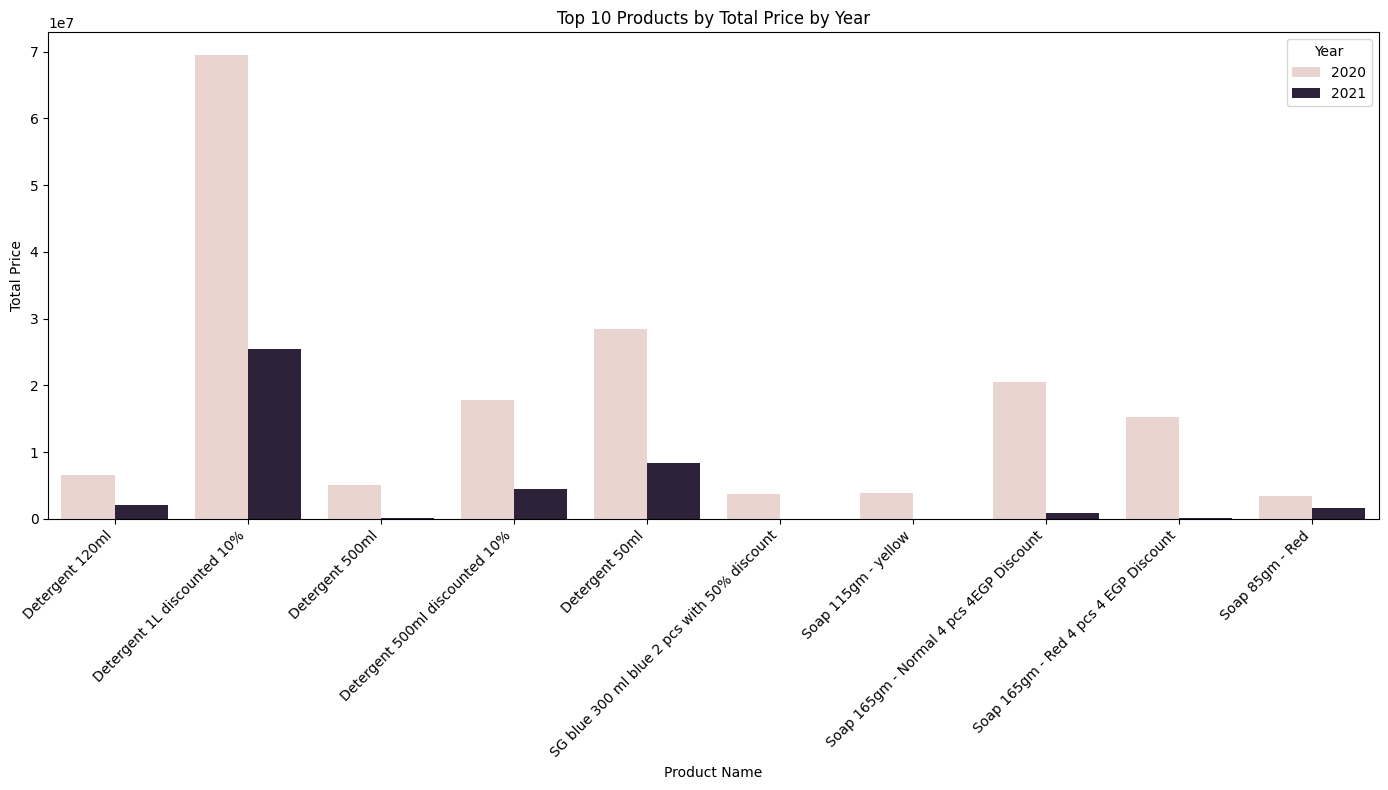

#  Department During Year

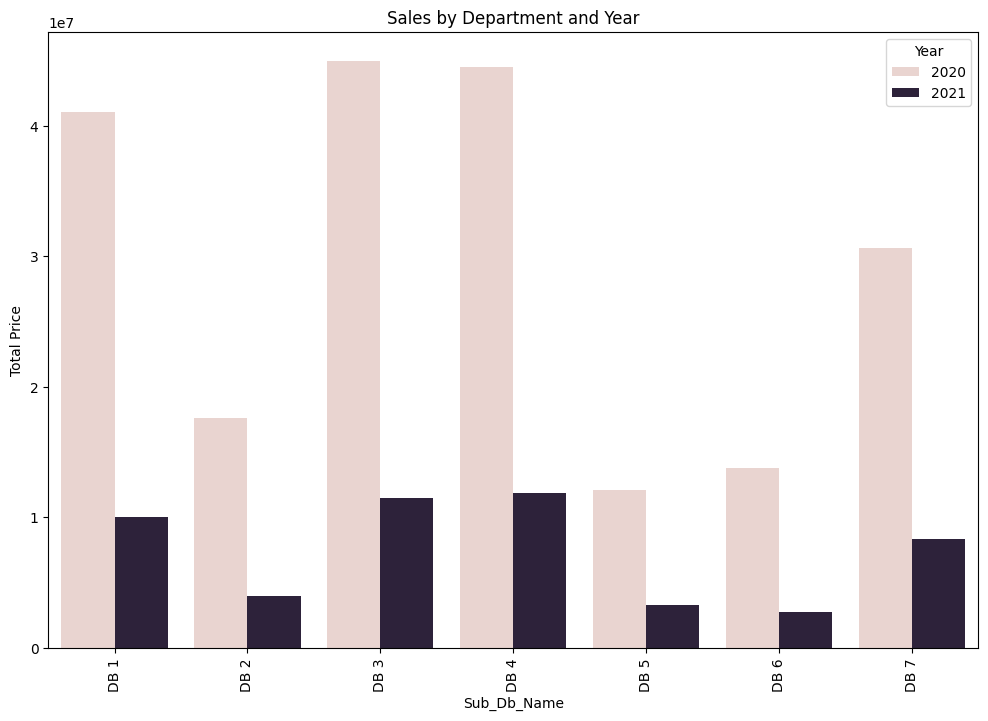

#  Department Employee

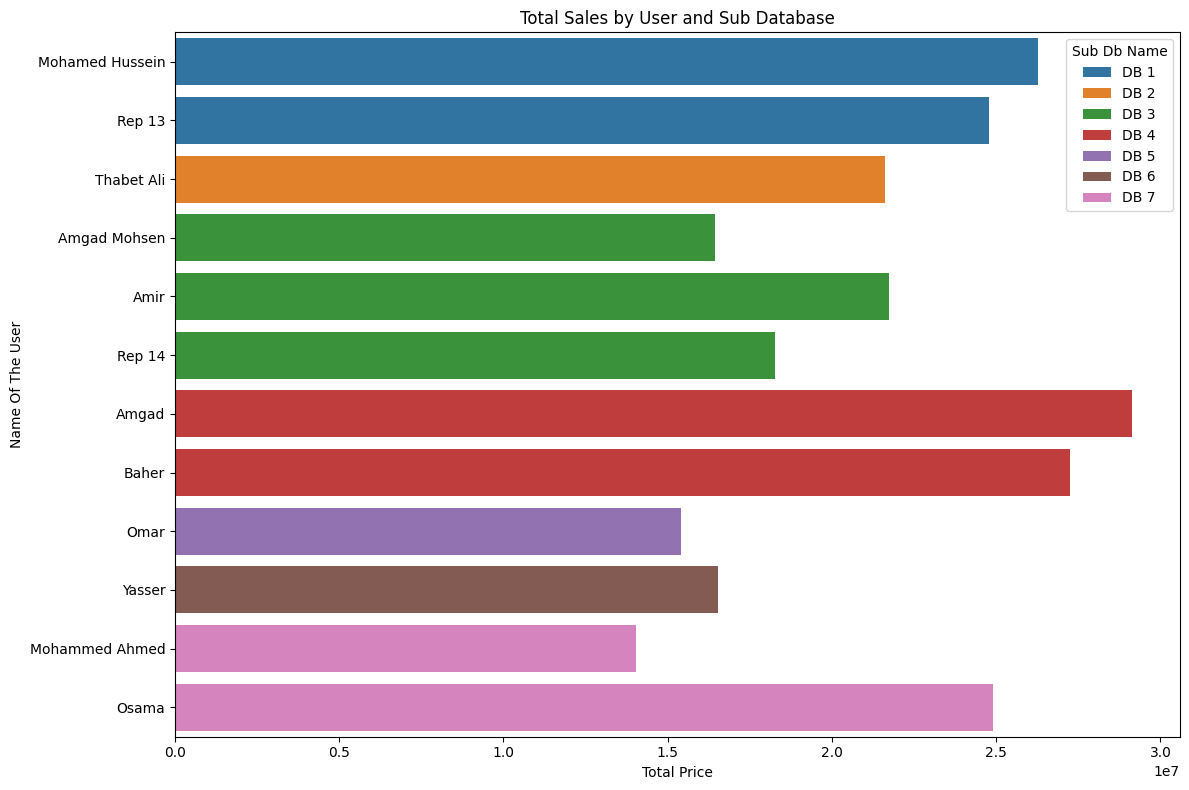

#  Department Employee During Year

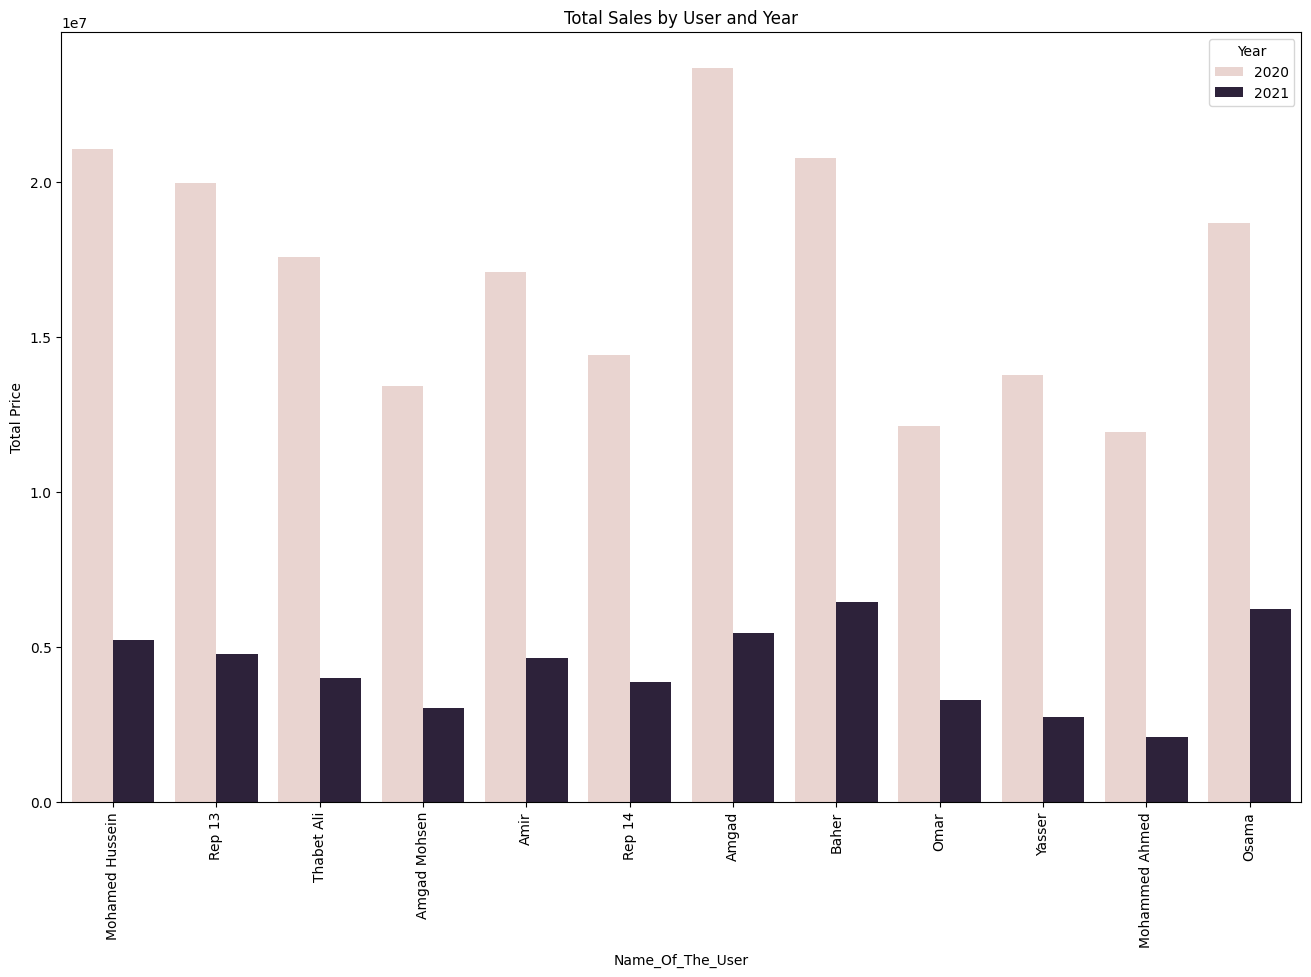

#  Outlet Class Department

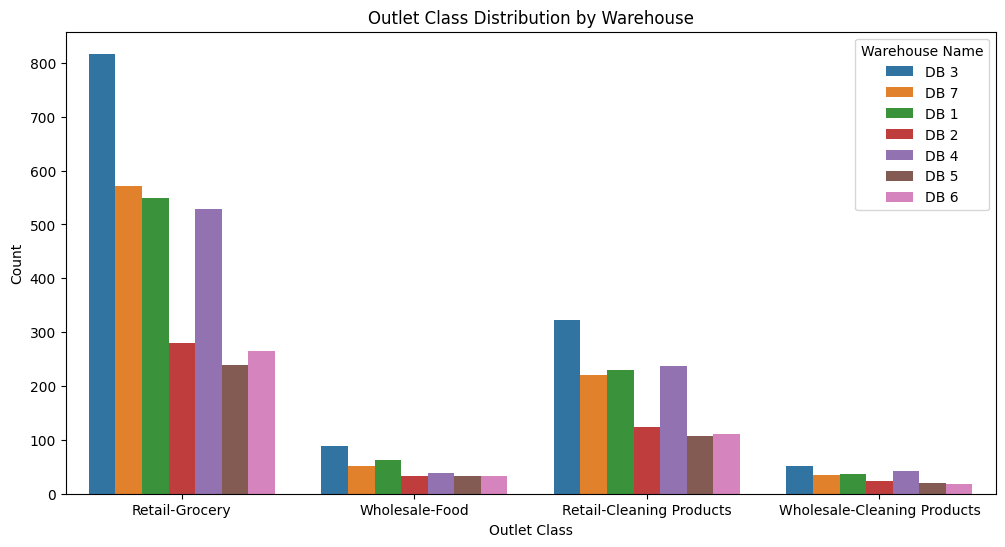

# Outlet Class Employee

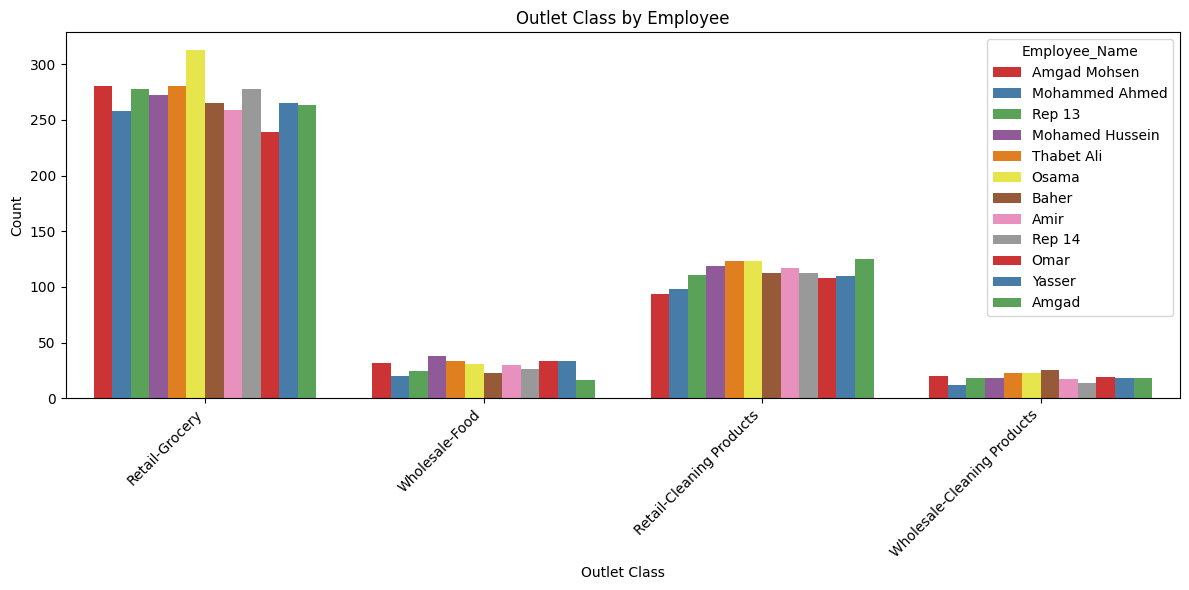

#  Employee with Active Customer

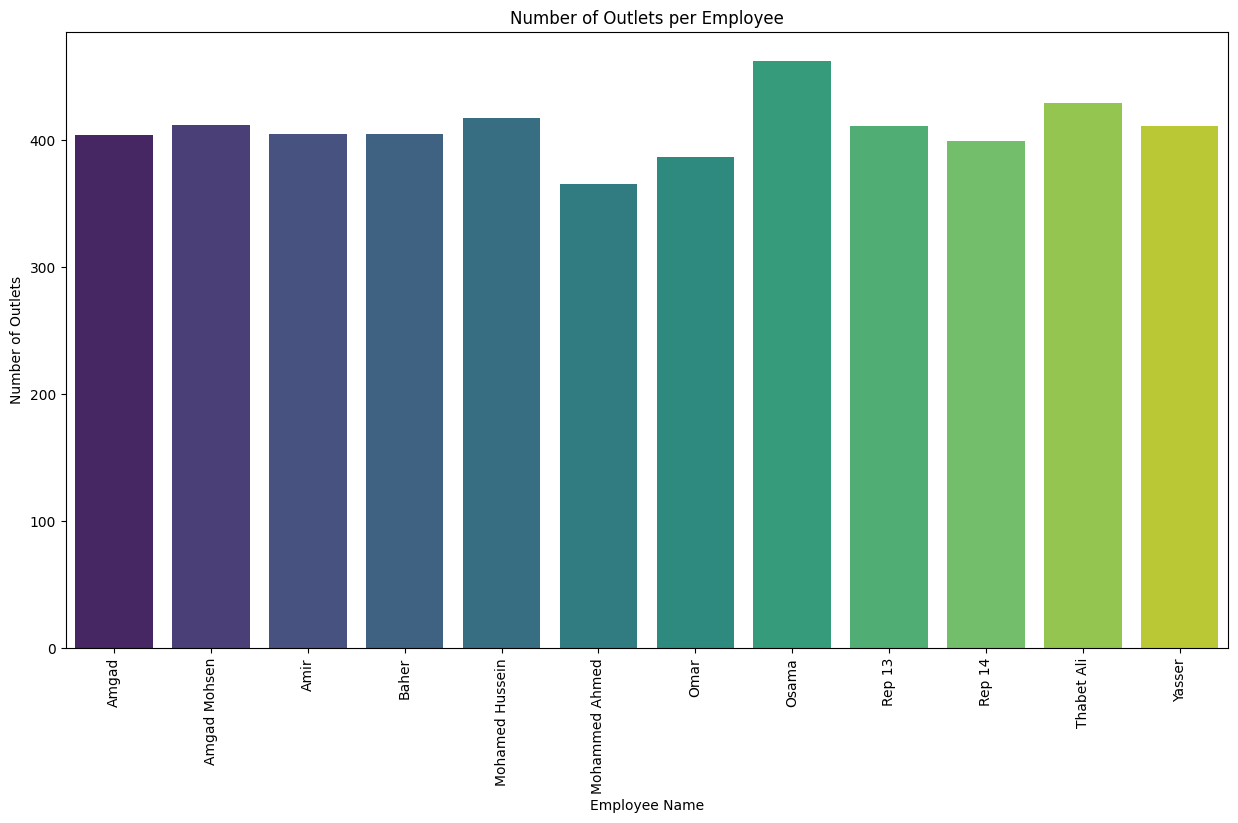

# EDA Classification with Department

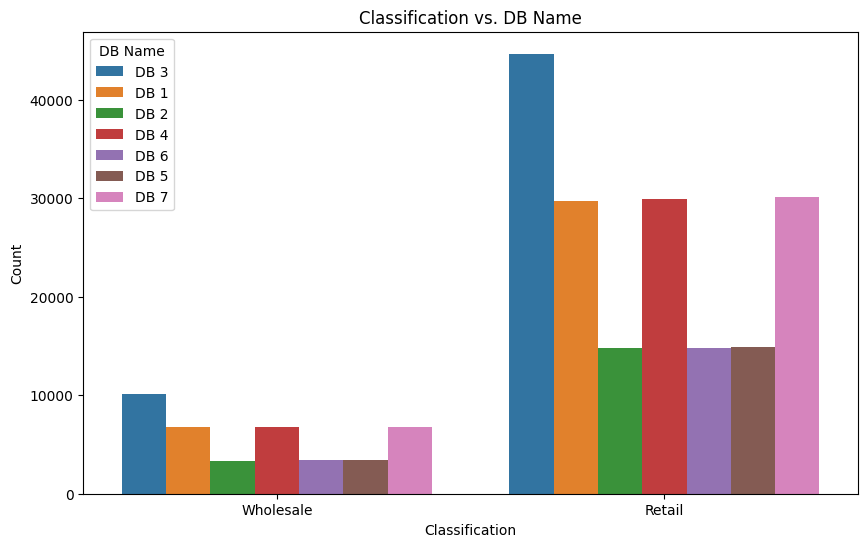


# Analysis Price and Category (Year - Month)

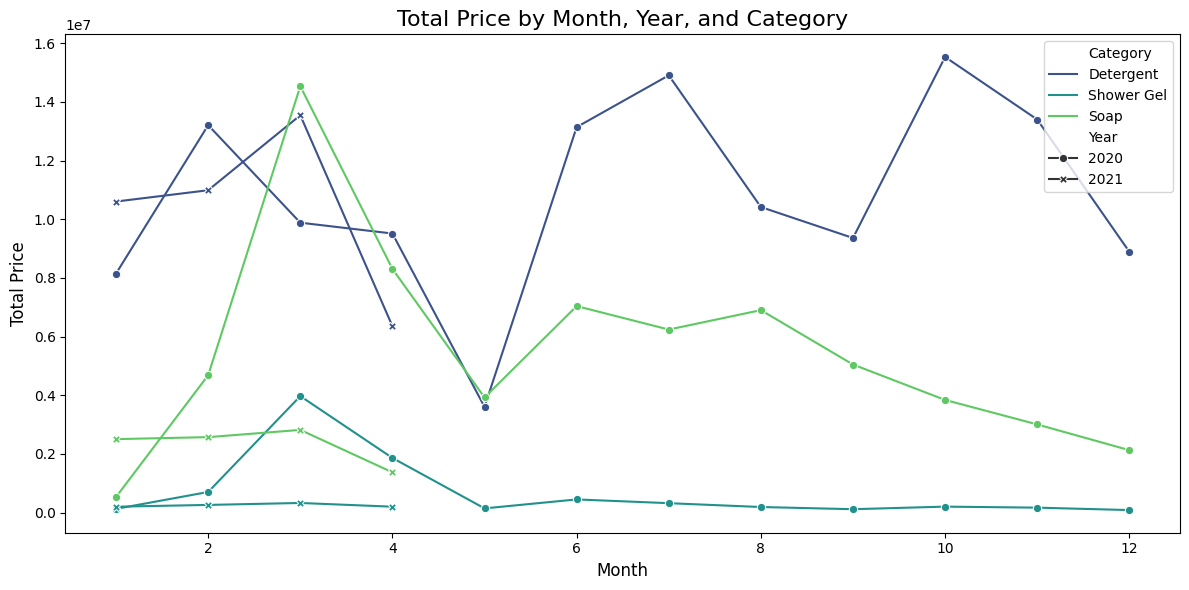

# Analysis Quantity Compare (Year - Category)

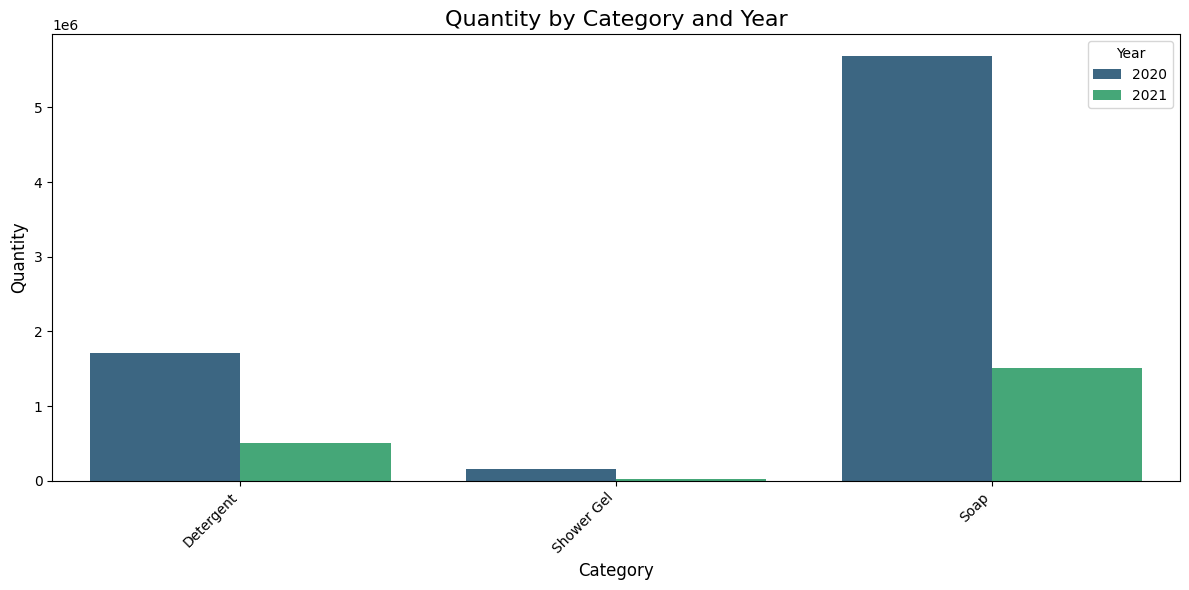

# Analysis Total Price Compare (Year - Category)

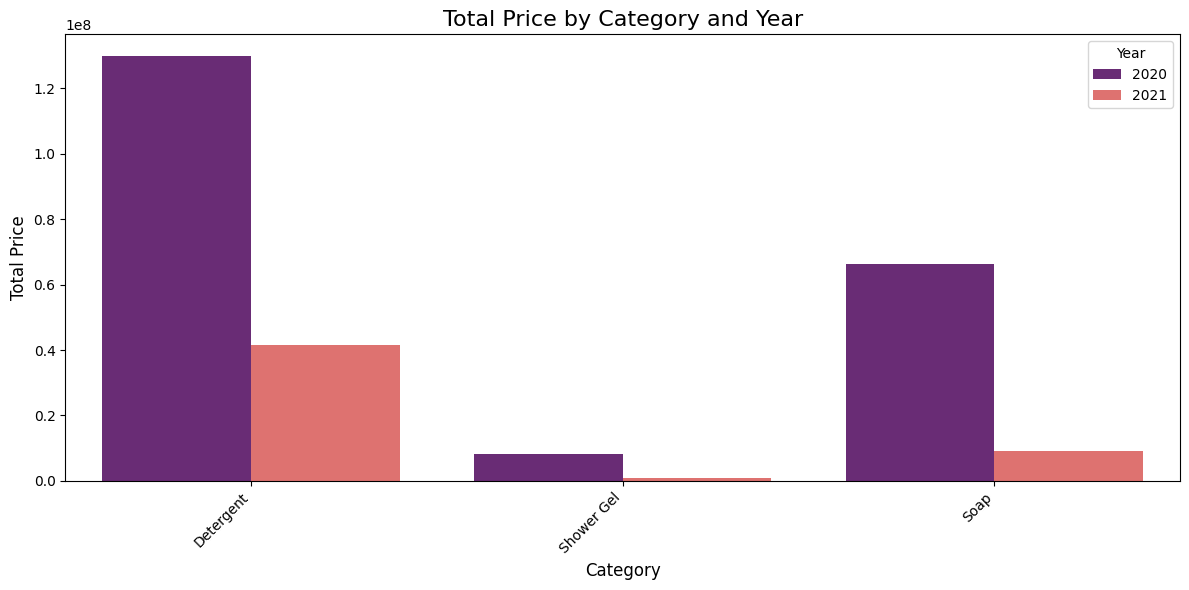

# Compare (Total Price - Quantity)

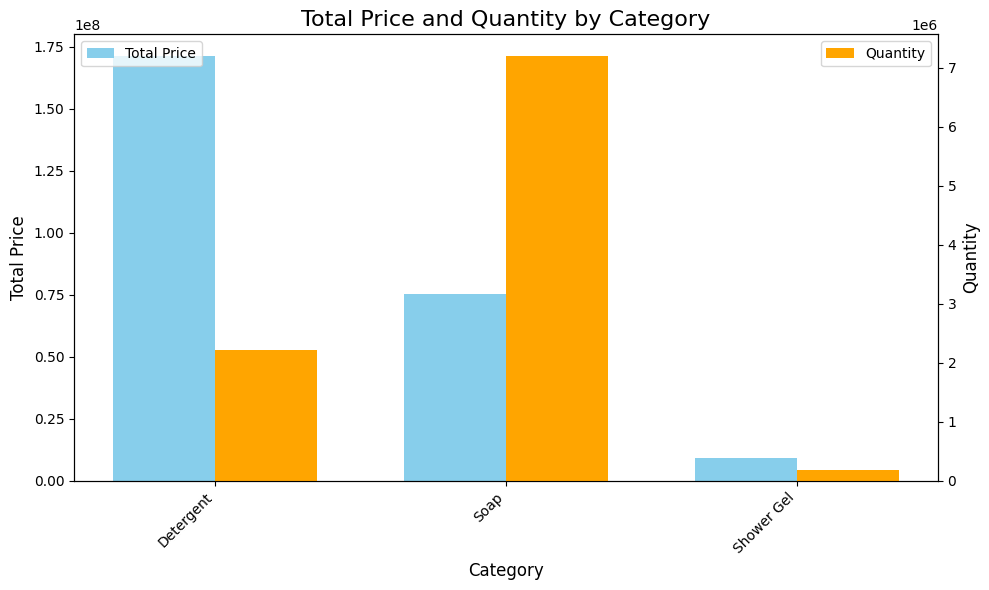